In [ ]:
from google.colab import drive

# Lệnh này sẽ mount Google Drive vào thư mục /content/drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
ROSSMANN_RED = '#C3002D'      # Màu chính (Primary)
ROSSMANN_GREY = '#888888'     # Màu phụ 1 (Secondary 1 - Dùng cho đối chiếu/No Promo)
ROSSMANN_LIGHT_GREY = '#C3C3C3' # Màu phụ 2 (Grid/Background)
TEXT_COLOR = '#333333'        # Màu chữ

PROMO_PALETTE = {
    0: ROSSMANN_GREY,      1: ROSSMANN_RED,
    '0': ROSSMANN_GREY,    '1': ROSSMANN_RED,
    'No_Promo': ROSSMANN_GREY, 'Promo': ROSSMANN_RED
}
MAIN_COLOR = ROSSMANN_RED

In [ ]:
import pandas as pd

# 1. Load dữ liệu (Đảm bảo đường dẫn file đúng với Drive của bạn)
train = pd.read_csv('/content/drive/MyDrive/data_ml/train.csv', dtype={'StateHoliday': str})
store = pd.read_csv('/content/drive/MyDrive/data_ml/store.csv')
train['Date'] = pd.to_datetime(train['Date'])

# 2. Kiểm tra dữ liệu ngày thiếu
store_date_counts = train.groupby('Store')['Date'].nunique()
expected_days = (train['Date'].max() - train['Date'].min()).days + 1
duplicate_store_dates = store_date_counts[store_date_counts < expected_days]

# Lấy danh sách các cửa hàng thiếu ngày
incomplete_stores = duplicate_store_dates.index.tolist()

# 3. Giữ lại cửa hàng 988 (Remove 988 khỏi danh sách bị xóa)
if 988 in incomplete_stores:
    incomplete_stores.remove(988)

print(f"Số lượng cửa hàng sẽ bị xóa: {len(incomplete_stores)}")

# 4. Loại bỏ các cửa hàng này khỏi tập Train và Store
train_clean = train[~train['Store'].isin(incomplete_stores)]
store_clean = store[~store['Store'].isin(incomplete_stores)]

# 5. IN RA KẾT QUẢ CÒN LẠI (Output bạn cần)
print("-" * 30)
print(f"Tổng số cửa hàng ban đầu: {train['Store'].nunique()}")
print(f"Số lượng cửa hàng còn lại trong Train: {train_clean['Store'].nunique()}")
print(f"Số lượng cửa hàng còn lại trong Store: {store_clean['Store'].nunique()}")
print("-" * 30)

Số lượng cửa hàng sẽ bị xóa: 180
------------------------------
Tổng số cửa hàng ban đầu: 1115
Số lượng cửa hàng còn lại trong Train: 935
Số lượng cửa hàng còn lại trong Store: 935
------------------------------


In [ ]:
# Merge data
df_merge = pd.merge(train_clean, store_clean, on='Store', how='left')
print("\n--- Dữ liệu THÔ sau khi merge ---")
print(f"Tổng số dòng: {df_merge.shape[0]}")
print(f"Tổng số cột: {df_merge.shape[1]}")
display(df_merge.head())


--- Dữ liệu THÔ sau khi merge ---
Tổng số dòng: 880769
Tổng số cột: 18


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Data Dictionary (Từ điển dữ liệu)

| Tên Cột | Nguồn | Ý Nghĩa & Giải Thích Chi Tiết |
| :--- | :---: | :--- |
| **Store** | Cả 2 | ID định danh duy nhất của mỗi cửa hàng (Key để merge). |
| **DayOfWeek** | Train | Ngày trong tuần (1 = Thứ 2, ..., 7 = Chủ Nhật). |
| **Date** | Train | Ngày phát sinh giao dịch. |
| **Sales** | Train | **Biến mục tiêu (Target Variable):** Doanh thu trong ngày. |
| **Customers** | Train | Số lượng khách hàng đến mua sắm trong ngày. |
| **Open** | Train | Trạng thái cửa hàng: `0` = Đóng cửa, `1` = Mở cửa. |
| **Promo** | Train | **Khuyến mãi ngắn hạn:** `1` = Cửa hàng đang chạy promo ngày hôm đó, `0` = Không. |
| **StateHoliday** | Train | Ngày nghỉ lễ quốc gia: `a` = Public holiday, `b` = Easter, `c` = Christmas, `0` = Ngày thường. |
| **SchoolHoliday** | Train | Ngày nghỉ học: `1` = Trường công lập đóng cửa vào ngày đó, `0` = Không. |
| **StoreType** | Store | Mô hình cửa hàng: Có 4 loại `a`, `b`, `c`, `d` (Ví dụ: cửa hàng nhỏ, siêu thị lớn...). |
| **Assortment** | Store | Mức độ đa dạng hàng hóa: `a` = Basic (Cơ bản), `b` = Extra (Thêm), `c` = Extended (Mở rộng). |
| **CompetitionDistance** | Store | Khoảng cách (mét) đến đối thủ cạnh tranh gần nhất. |
| **CompetitionOpenSince[Month/Year]** | Store | Thời điểm (Tháng/Năm) đối thủ cạnh tranh gần nhất bắt đầu mở cửa. |
| **Promo2** | Store | **Khuyến mãi dài hạn/tiếp diễn:** `0` = Không tham gia, `1` = Có tham gia. |
| **Promo2Since[Week/Year]** | Store | Tuần và Năm bắt đầu tham gia chương trình Promo2. |
| **PromoInterval** | Store | Các tháng mà Promo2 được khởi động lại (Ví dụ: "Jan,Apr,Jul,Oct"). |

In [ ]:
df_open = df_merge[(df_merge['Open'] == 1) & (df_merge['Sales'] > 0)].copy()

print("\n--- CHỈ LẤY NHỮNG NGÀY MỞ CỬA VÀ CÓ DOANH THU > O ---")
print(f"Tổng số dòng: {df_open.shape[0]}")
print(f"Tổng số cột: {df_open.shape[1]}")
display(df_open.head())


--- CHỈ LẤY NHỮNG NGÀY MỞ CỬA VÀ CÓ DOANH THU > O ---
Tổng số dòng: 732379
Tổng số cột: 18


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


# LÀM CHỦ "VŨ KHÍ" PROMO!

--- KẾT QUẢ PHÂN TÍCH TÁC ĐỘNG CỦA PROMO ---
Doanh thu trung bình (Không Promo): 5,947
Doanh thu trung bình (Có Promo):    8,313
Sales Uplift (Mức tăng trưởng):     39.78%
--------------------------------------------------


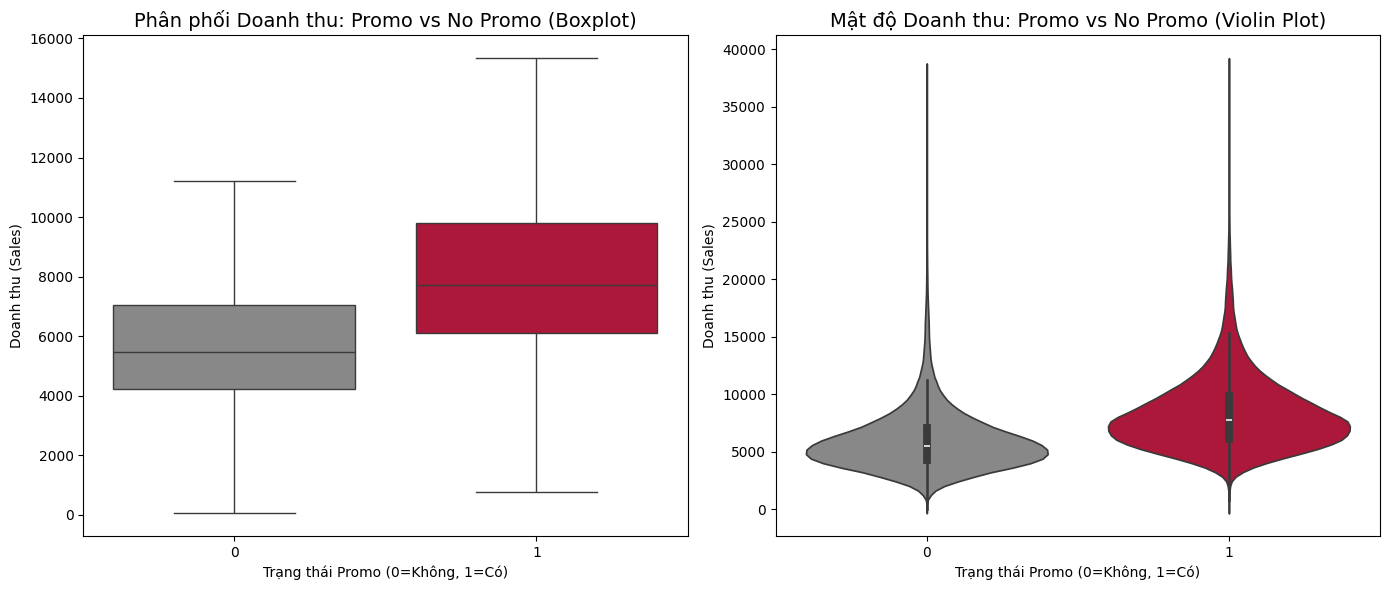

In [ ]:

# Ensure 'Promo' column is of integer type for correct palette mapping right before plotting
df_open['Promo'] = df_open['Promo'].astype(int)

# ---  Tính toán Sales Uplift (Lift Analysis) ---
# Tính trung bình Sales theo nhóm Promo
promo_stats = df_open.groupby('Promo')['Sales'].mean()
sales_no_promo = promo_stats[0]
sales_promo = promo_stats[1]

# Tính % tăng trưởng (Uplift)
uplift = ((sales_promo - sales_no_promo) / sales_no_promo) * 100

print(f"--- KẾT QUẢ PHÂN TÍCH TÁC ĐỘNG CỦA PROMO ---")
print(f"Doanh thu trung bình (Không Promo): {sales_no_promo:,.0f}")
print(f"Doanh thu trung bình (Có Promo):    {sales_promo:,.0f}")
print(f"Sales Uplift (Mức tăng trưởng):     {uplift:.2f}%")
print("-" * 50)


# ---  Trực quan hóa (Boxplot & Violin Plot) ---
plt.figure(figsize=(14, 6))

# Biểu đồ 1: Boxplot - Hiển thị phân phối và các giá trị ngoại lai (Outliers)
plt.subplot(1, 2, 1)
sns.boxplot(x='Promo', y='Sales', data=df_open, palette=PROMO_PALETTE, showfliers=False) # showfliers=False để ẩn bớt các điểm ngoại lai quá xa giúp nhìn chart gọn hơn
plt.title('Phân phối Doanh thu: Promo vs No Promo (Boxplot)', fontsize=14)
plt.xlabel('Trạng thái Promo (0=Không, 1=Có)')
plt.ylabel('Doanh thu (Sales)')

# Biểu đồ 2: Violin Plot - Hiển thị mật độ dữ liệu (độ phình của biểu đồ)
plt.subplot(1, 2, 2)
sns.violinplot(x='Promo', y='Sales', data=df_open, palette=PROMO_PALETTE)
plt.title('Mật độ Doanh thu: Promo vs No Promo (Violin Plot)', fontsize=14)
plt.xlabel('Trạng thái Promo (0=Không, 1=Có)')
plt.ylabel('Doanh thu (Sales)')

plt.tight_layout()
plt.show()

=== Hiệu quả của Promo ===
Tăng trưởng Lượng khách (Traffic): 21.51%
Tăng trưởng Giá trị giỏ hàng (Basket Size): 14.14%


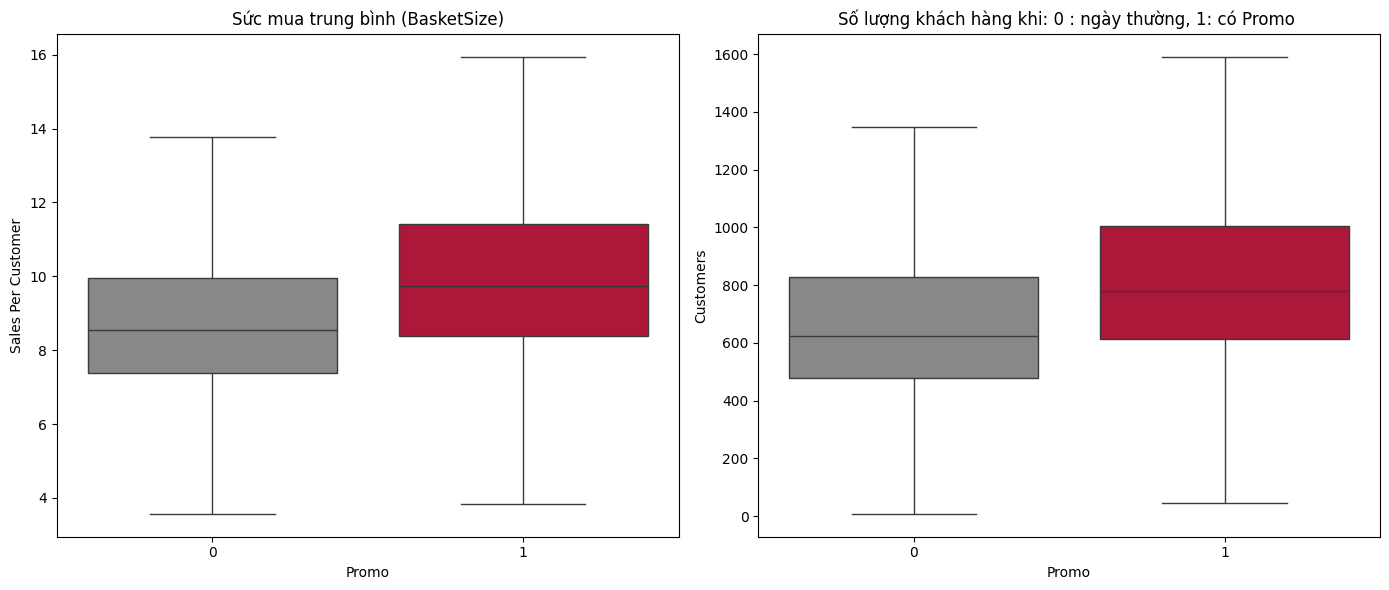

In [ ]:
#  Tính toán chỉ số SalesPerCustomer (Basket Size)
df_open['BasketSize'] = df_open['Sales'] / df_open['Customers']

#  Tính toán các chỉ số trung bình theo Promo
promo_stats = df_open.groupby('Promo')[['Sales', 'Customers', 'BasketSize']].mean().reset_index()

# Tính % tăng trưởng
traffic_growth = (promo_stats.loc[1, 'Customers'] - promo_stats.loc[0, 'Customers']) / promo_stats.loc[0, 'Customers'] * 100
basket_growth = (promo_stats.loc[1, 'BasketSize'] - promo_stats.loc[0, 'BasketSize']) / promo_stats.loc[0, 'BasketSize'] * 100

print(f"=== Hiệu quả của Promo ===")
print(f"Tăng trưởng Lượng khách (Traffic): {traffic_growth:.2f}%")
print(f"Tăng trưởng Giá trị giỏ hàng (Basket Size): {basket_growth:.2f}%")
# Tạo khung hình (Figure) với 1 hàng và 2 cột
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
# --- BIỂU ĐỒ 2: Boxplot Sức mua (BasketSize) ---
sns.boxplot(data=df_open, x='Promo', y='BasketSize', palette=PROMO_PALETTE,
            ax=axes[0], showfliers=False)
axes[0].set_title('Sức mua trung bình (BasketSize)')
axes[0].set_ylabel('Sales Per Customer')

# --- BIỂU ĐỒ 3: Boxplot Lượng khách (Customers) ---
sns.boxplot(data=df_open, x='Promo', y='Customers', palette=PROMO_PALETTE,
            ax=axes[1], showfliers=False)
axes[1].set_title('Số lượng khách hàng khi: 0 : ngày thường, 1: có Promo ')
axes[1].set_ylabel('Customers')

# Căn chỉnh lại khoảng cách giữa các biểu đồ cho đẹp
plt.tight_layout()
plt.show()

## 1.BING

Promo là một vũ khí mạnh mẽ!

- Promo giúp doanh thu trung bình tăng từ 5900 lên 8200, tương đương mức tăng trưởng 38.77%.

- Promo không chỉ lôi kéo thêm khách hàng mới (Traffic tăng 21%) mà còn khiến họ chịu chi nhiều hơn cho mỗi lần mua (Giá trị giỏ hàng tăng 13.8%).


Nhưng nếu sử dụng sai chỗ, thì không chỉ lãng phí vốn đầu tư cho chương trình promo mà còn, giết chết lợi nhuận.

Trong bài trình bày này, chúng ta sẽ đi qua 3 điểm mấu chốt để biến Promo từ một chi phí lãng phí thành động lực tăng trưởng thực sự:


**Ở đâu:** Tại sao chúng ta phải ngừng ngay lập tức khuyến mãi ở Sân bay/Nhà ga (Store 'b') và dồn toàn lực vào khu dân cư (Store 'a').



**Khi nào:** Tại sao Thứ Hai là "mỏ vàng" còn Thứ Sáu là vùng đất chết, và nghịch lý về hành vi mua sắm trước - sau lễ.






**Chiến lược:** Cách dùng Promo để phòng thủ trước đối thủ sát vách và hút khách từ xa.

## 2.BANG

### A. Nghịch lý về Địa điểm: "Thuốc độc" và "Ngôi sao sáng"

--- BẢNG HIỆU QUẢ LỢI NHUẬN (CHỈ TÍNH THỨ 2 - THỨ 6) ---


,Avg_Profit_NoPromo,Avg_Profit_Promo,Profit_Uplift_%
StoreType,,,
a,"2,434.1","2,518.6",3.5
b,"3,856.3","3,474.8",-9.9
c,"2,333.8","2,439.0",4.5
d,"2,253.6","2,414.7",7.1


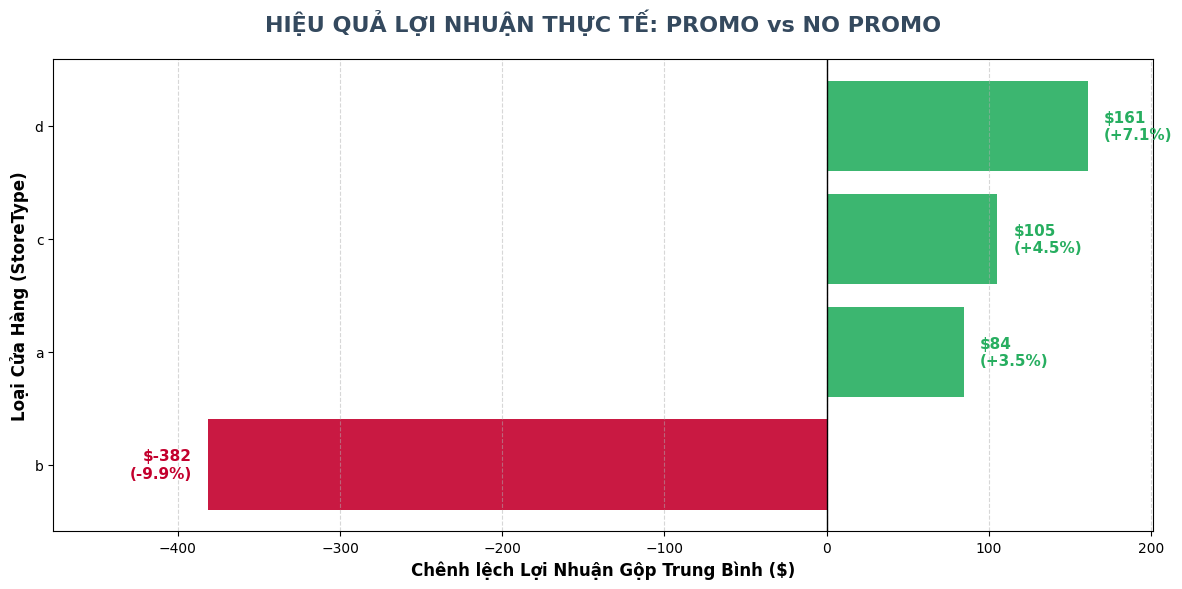

In [ ]:

# 1. THIẾT LẬP GIẢ ĐỊNH & LỌC DỮ LIỆU
MARGIN_NO_PROMO = 0.40  # 40% Lợi nhuận
MARGIN_WITH_PROMO = 0.30  # 30% Lợi nhuận

# --- QUAN TRỌNG: CHỈ LẤY DỮ LIỆU TỪ THỨ 2 ĐẾN THỨ 6 ---
# Giả định: DayOfWeek 1=Mon, ..., 5=Fri, 6=Sat, 7=Sun
# Loại bỏ hoàn toàn T7 và CN ra khỏi tính toán
df_weekdays = df_open[df_open['DayOfWeek'] <= 5].copy()

# 2. TÍNH TOÁN GROSS PROFIT TRÊN DỮ LIỆU ĐÃ LỌC
df_weekdays['GrossProfit'] = np.where(
    df_weekdays['Promo'] == 1,
    df_weekdays['Sales'] * MARGIN_WITH_PROMO,
    df_weekdays['Sales'] * MARGIN_NO_PROMO
)

# 3. TỔNG HỢP DỮ LIỆU (GROUPBY & PIVOT)
# Tính trung bình theo StoreType và Promo
stats = df_weekdays.groupby(['StoreType', 'Promo'])['GrossProfit'].mean().reset_index()

# Pivot bảng
table = stats.pivot(index='StoreType', columns='Promo', values='GrossProfit')
table.columns = ['Avg_Profit_NoPromo', 'Avg_Profit_Promo']

# Tính % Tăng trưởng (Uplift)
table['Profit_Uplift_%'] = ((table['Avg_Profit_Promo'] - table['Avg_Profit_NoPromo']) / table['Avg_Profit_NoPromo']) * 100

# Hiển thị bảng số liệu trước khi vẽ
print("--- BẢNG HIỆU QUẢ LỢI NHUẬN (CHỈ TÍNH THỨ 2 - THỨ 6) ---")
display(table.style.background_gradient(cmap='RdYlGn', subset=['Profit_Uplift_%']).format("{:,.1f}"))

# --- 1. CHUẨN BỊ DỮ LIỆU (GIỮ NGUYÊN PHẦN TÍNH TOÁN CỦA BẠN) ---
# (Đảm bảo bạn đã chạy phần tính toán table ở trên)
# Tính chênh lệch tuyệt đối (Số tiền Lãi/Lỗ thực tế)
table['Profit_Diff'] = table['Avg_Profit_Promo'] - table['Avg_Profit_NoPromo']

# Sắp xếp lại dữ liệu theo mức độ Lãi/Lỗ để biểu đồ đẹp hơn
table_sorted = table.sort_values('Profit_Diff', ascending=True)

# --- 2. VẼ BIỂU ĐỒ DIVERGING BAR CHART ---
plt.figure(figsize=(12, 6))

# Tạo danh sách màu: Đỏ nếu Lỗ (Âm), Xanh lá nếu Lãi (Dương)
# Lưu ý: ROSSMANN_RED đã được define ở đầu file, ta dùng màu xanh chuẩn của tài chính cho phần Lãi
colors = [ROSSMANN_RED if x < 0 else '#27ae60' for x in table_sorted['Profit_Diff']]

# Vẽ biểu đồ cột ngang (Horizontal Bar)
bars = plt.barh(table_sorted.index, table_sorted['Profit_Diff'], color=colors, alpha=0.9)

# --- 3. TRANG TRÍ BIỂU ĐỒ ---
plt.title('HIỆU QUẢ LỢI NHUẬN THỰC TẾ: PROMO vs NO PROMO',
          fontsize=16, fontweight='bold', pad=20, color='#34495E')
plt.xlabel('Chênh lệch Lợi Nhuận Gộp Trung Bình ($)', fontsize=12, fontweight='bold')
plt.ylabel('Loại Cửa Hàng (StoreType)', fontsize=12, fontweight='bold')

# Vẽ đường trung tâm (Zero line)
plt.axvline(x=0, color='black', linestyle='-', linewidth=1)

# Thêm lưới mờ dọc
plt.grid(axis='x', linestyle='--', alpha=0.5)

# --- 4. GẮN NHÃN GIÁ TRỊ (ANNOTATION) ---
# Hàm gắn nhãn thông minh: Lỗ thì gắn bên trái cột, Lãi thì gắn bên phải cột
for bar, val, pct in zip(bars, table_sorted['Profit_Diff'], table_sorted['Profit_Uplift_%']):
    # Định dạng text: "$Tiền (+/-%)"
    label_text = f"${val:,.0f}\n({pct:+.1f}%)"

    # Xác định vị trí và căn lề
    if val < 0:
        align = 'right'
        x_pos = val - 10 # Đẩy sang trái một chút
        txt_color = ROSSMANN_RED
    else:
        align = 'left'
        x_pos = val + 10 # Đẩy sang phải một chút
        txt_color = '#27ae60'

    plt.text(x_pos, bar.get_y() + bar.get_height()/2, label_text,
             va='center', ha=align, fontsize=11, fontweight='bold', color=txt_color)

# Điều chỉnh giới hạn trục X để nhãn không bị cắt (Mở rộng thêm 15% về 2 phía)
x_min, x_max = table_sorted['Profit_Diff'].min(), table_sorted['Profit_Diff'].max()
plt.xlim(x_min * 1.25, x_max * 1.25)

plt.tight_layout()
plt.show()


### *** Store 'b' (Sân bay/Nhà ga) - Nơi Promo là "Thuốc độc":***

Khách hàng bước vào Store 'b' (Sân bay/Nhà ga) là những người đang vội vã, những du khách lỡ đường, hoặc những người đang chờ tàu xe.

Họ cần gì? Sự tiện lợi tức thì.

Họ quan tâm gì? "Có hàng hay không", chứ không phải "Giá bao nhiêu".

Đây là nhóm khách hàng có độ nhạy cảm về giá cực thấp (Low Price Elasticity). Một chai nước suối hay một gói khăn giấy ở đây dù có bán nguyên giá thì họ vẫn bắt buộc phải mua.

 Khi chạy Promo, lợi nhuận Store 'b' giảm 9.9%.
Bởi vì khi bạn giảm giá tại Sân bay/Nhà ga, bạn đang "tặng tiền" cho những người vốn dĩ đã sẵn sàng trả đủ tiền.

Bạn không cần Promo để kéo khách vào (Traffic Driver) vì khách đã ở sẵn đó rồi (họ đang chờ tàu/máy bay).

Bạn không cần Promo để tăng giá trị giỏ hàng (Basket Size) vì họ chỉ mua đúng thứ họ cần để mang đi.

Việc chạy Promo ở Store 'b' giống như việc bạn bán vé hạng thương gia với giá vé hạng phổ thông cho một người tỉ phú. Họ sẽ mua, nhưng bạn mất đi một khoản lợi nhuận khổng lồ mà không thu lại thêm được lợi ích gì.



### *** Store 'a' và 'd' (Khu dân cư) - "Ngôi sao sáng" ***



Ngược lại, StoreType 'd' và 'a' (với Assortment Basic) lại là những "ngôi sao sáng". Đặc biệt là phân khúc "Vàng" (Store 'a' bán đồ Basic): Tăng trưởng tới 48%.

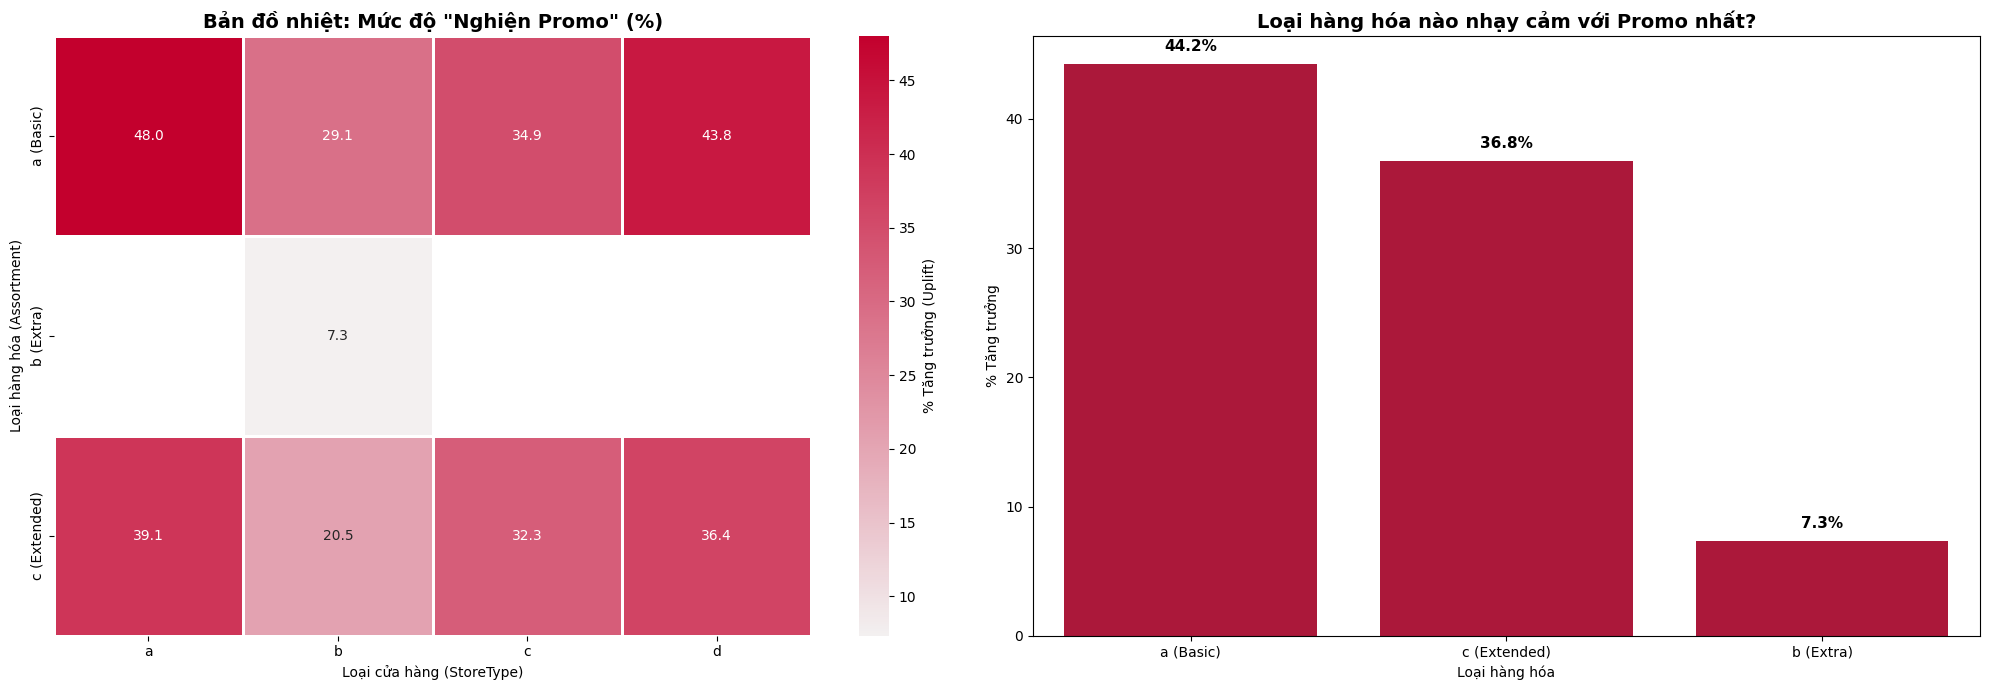


BẢNG PHÂN TÍCH CHI TIẾT HIỆU QUẢ KHUYẾN MÃI THEO LOẠI HÀNG
                           DS TB (Không KM)  DS TB (Có KM)  Tăng thêm (Tiền)  % Tăng trưởng
StoreType Assortment_Full                                                                  
a         a (Basic)                5,418.80       8,020.90          2,602.10          48.02
d         a (Basic)                5,412.24       7,783.76          2,371.52          43.82
a         c (Extended)             6,448.19       8,966.39          2,518.20          39.05
d         c (Extended)             5,998.46       8,183.65          2,185.19          36.43
c         a (Basic)                5,937.90       8,012.09          2,074.19          34.93
          c (Extended)             6,238.56       8,251.58          2,013.03          32.27
b         a (Basic)               10,022.30      12,935.16          2,912.87          29.06
          c (Extended)            16,662.36      20,082.86          3,420.49          20.53
          b (Extra) 

In [ ]:

# Map tên đầy đủ cho dễ hiểu
assort_map = {'a': 'a (Basic)', 'b': 'b (Extra)', 'c': 'c (Extended)'}
df_analysis = df_open.copy()
df_analysis['Assortment_Full'] = df_analysis['Assortment'].map(assort_map)

#  Chuẩn bị dữ liệu: Group theo StoreType và Assortment
# Tính doanh thu trung bình
assort_stats = df_analysis.groupby(['StoreType', 'Assortment_Full', 'Promo'])['Sales'].mean().unstack()
assort_stats.columns = ['No_Promo', 'Promo']

# Tính % Tăng trưởng (Uplift)
assort_stats['Uplift_Pct'] = ((assort_stats['Promo'] - assort_stats['No_Promo']) / assort_stats['No_Promo']) * 100

# Vẽ biểu đồ
fig, axes = plt.subplots(1, 2, figsize=(20, 7))

# --- PLOT 1: Heatmap (StoreType vs Assortment) ---
# Chuyển đổi dữ liệu sang dạng ma trận cho Heatmap
# Index = Assortment, Columns = StoreType, Values = Uplift %
heatmap_data = assort_stats['Uplift_Pct'].unstack(level=0)

# Vẽ Heatmap
sns.heatmap(heatmap_data, annot=True, fmt=".1f",
            cmap=sns.light_palette(ROSSMANN_RED, as_cmap=True), # Tông đỏ Rossmann
            linewidths=1, linecolor='white',
            cbar_kws={'label': '% Tăng trưởng (Uplift)'},
            ax=axes[0])

axes[0].set_title('Bản đồ nhiệt: Mức độ "Nghiện Promo" (%)', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Loại hàng hóa (Assortment)')
axes[0].set_xlabel('Loại cửa hàng (StoreType)')

# --- PLOT 2: Tổng quan theo Assortment (Bar Chart) ---
# Tính trung bình Uplift chỉ theo Assortment để so sánh gộp
assort_only = df_analysis.groupby(['Assortment_Full', 'Promo'])['Sales'].mean().unstack()
assort_only.columns = ['No_Promo', 'Promo']
assort_only['Uplift_Pct'] = ((assort_only['Promo'] - assort_only['No_Promo']) / assort_only['No_Promo']) * 100
assort_only = assort_only.sort_values('Uplift_Pct', ascending=False)

sns.barplot(x=assort_only.index, y=assort_only['Uplift_Pct'], color=MAIN_COLOR, ax=axes[1])
axes[1].set_title('Loại hàng hóa nào nhạy cảm với Promo nhất?', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Loại hàng hóa')
axes[1].set_ylabel('% Tăng trưởng')

# Thêm nhãn giá trị
for i, v in enumerate(assort_only['Uplift_Pct']):
    axes[1].text(i, v + 1, f"{v:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

# --- TẠO BẢNG BÁO CÁO CHI TIẾT ---

# 1. Tạo bảng chi tiết từ dữ liệu đã tính toán (assort_stats)
# assort_stats hiện đang có MultiIndex (StoreType, Assortment) và cột [No_Promo, Promo, Uplift_Pct]
detailed_report = assort_stats.copy()

# 2. Tính thêm cột "Chênh lệch tuyệt đối" (Absolute Difference)
# Để biết khuyến mãi mang về thêm bao nhiêu tiền thực tế chứ không chỉ là %
detailed_report['Diff_Value'] = detailed_report['Promo'] - detailed_report['No_Promo']

# 3. Sắp xếp lại cột cho logic: Không KM -> Có KM -> Chênh lệch tiền -> % Tăng trưởng
detailed_report = detailed_report[['No_Promo', 'Promo', 'Diff_Value', 'Uplift_Pct']]

# 4. Đổi tên cột sang tiếng Việt cho dễ đọc
detailed_report.columns = [
    'DS TB (Không KM)',
    'DS TB (Có KM)',
    'Tăng thêm (Tiền)',
    '% Tăng trưởng'
]

# 5. Sắp xếp dữ liệu: Ưu tiên nhóm có % Tăng trưởng cao nhất lên đầu
detailed_report = detailed_report.sort_values('% Tăng trưởng', ascending=False)

# --- IN KẾT QUẢ ---

print("\n" + "="*60)
print("BẢNG PHÂN TÍCH CHI TIẾT HIỆU QUẢ KHUYẾN MÃI THEO LOẠI HÀNG")
print("="*60)

# Cách 1: In dạng text thuần (dùng trong Terminal/Console)
# Sử dụng to_string để format số liệu (2 chữ số thập phân)
print(detailed_report.to_string(float_format="{:,.2f}".format))

print("-" * 60)
# Cách 2: In ra các Top Insights (Nhận xét tự động)
top_seg = detailed_report.index[0] # Lấy dòng đầu tiên (cao nhất)
top_val = detailed_report.iloc[0]['% Tăng trưởng']
top_abs = detailed_report.iloc[0]['Tăng thêm (Tiền)']

print(f"\n💡 INSIGHTS QUAN TRỌNG:")
print(f"1. Phân khúc hiệu quả nhất: Cửa hàng '{top_seg[0]}' bán hàng '{top_seg[1]}'.")
print(f"   -> Tăng trưởng: {top_val:.1f}% (Tương đương tăng thêm {top_abs:,.0f} đơn vị tiền tệ/ngày).")

worst_seg = detailed_report.index[-1]
worst_val = detailed_report.iloc[-1]['% Tăng trưởng']
print(f"2. Phân khúc ít nhạy cảm nhất: Cửa hàng '{worst_seg[0]}' bán hàng '{worst_seg[1]}'.")
print(f"   -> Chỉ tăng trưởng: {worst_val:.1f}%.")

**1."Cặp Đôi Hoàn Hảo": Store 'a' + Assortment 'a' (Basic)**

Hãy nhìn vào ngôi sao sáng nhất trên bảng xếp hạng: Cửa hàng loại 'a' bán các mặt hàng cơ bản (Basic).

Tăng trưởng: Một con số khổng lồ +48.03%.

Doanh thu tăng thêm: Trung bình 2,602 EUR/ngày.

StoreType 'a' thường là các cửa hàng phố (Street store) gần khu dân cư. Assortment 'a' (Basic) là những nhu yếu phẩm hàng ngày: kem đánh răng, sữa tắm, bột giặt... Đây là những mặt hàng có độ nhạy cảm về giá cực cao (High Price Elasticity). Người dân sống quanh đó biết chính xác giá một chai dầu gội là bao nhiêu. Chỉ cần một cái tem đỏ "Giảm giá" dán lên, họ sẽ mua ngay lập tức, thậm chí mua tích trữ.

**2. Sự "Miễn Nhiễm" Của Cửa Hàng 'b' + Assortment 'b' (Extra)**

Ở chiều ngược lại, chúng ta có một sự lãng phí nguồn lực đáng báo động. Hãy nhìn vào Cửa hàng loại 'b' (Sân bay/Nhà ga) khi bán các mặt hàng loại 'b' (Extra - Hàng chuyên biệt/bổ sung).

Tăng trưởng: Chỉ vỏn vẹn +7.27%.

 Vốn dĩ Store 'b' đã có doanh thu nền cực cao (~8,700), nhưng khuyến mãi gần như không tạo ra cú hích nào đáng kể.

Tại sao lại thấp thảm hại như vậy? Assortment 'b' (Extra) thường là các sản phẩm không thiết yếu hoặc cao cấp hơn. Hãy tưởng tượng một hành khách đang vội vã ở sân bay. Họ vào mua chai nước (nhu cầu thiết yếu). Họ nhìn thấy một bộ mỹ phẩm cao cấp (Assortment Extra) đang giảm giá. Liệu họ có mua không? Không. Tâm trí họ đang ở chuyến bay sắp tới. Họ không có tâm trạng để cân nhắc mua sắm những món đồ "Extra" chỉ vì nó rẻ hơn một chút. Tại đây, khuyến mãi trở nên vô hình.



### B. Thời điểm vàng: " Monday" và Tâm lý Lễ hội

In [ ]:
df_open['Month'] = df_open['Date'].dt.month


BÁO CÁO PHÂN TÍCH: THỜI ĐIỂM ÁP DỤNG PROMO TỐT NHẤT

[A] HIỆU QUẢ THEO NGÀY TRONG TUẦN:
           No_Promo_Avg  Promo_Avg  Growth_Pct
DayOfWeek                                     
1               6281.18    9890.99       57.47
2               5788.84    8378.22       44.73
3               5659.17    7762.84       37.17
4               5811.44    7683.11       32.21
5               6389.63    7790.03       21.92
6               5800.32        NaN         NaN
7               8282.49        NaN         NaN

=> KẾT LUẬN NGÀY: Promo hiệu quả nhất vào Thứ 1 (Tăng trưởng 57.47%)

------------------------------
[B] TOP 3 THÁNG CÓ PROMO HIỆU QUẢ NHẤT:
       No_Promo_Avg  Promo_Avg  Growth_Pct
Month                                     
6           5880.65    8602.98       46.29
4           5868.49    8562.86       45.91
7           5753.58    8314.43       44.51

=> KẾT LUẬN THÁNG: Nên đẩy mạnh Promo vào các tháng: [6, 4, 7]


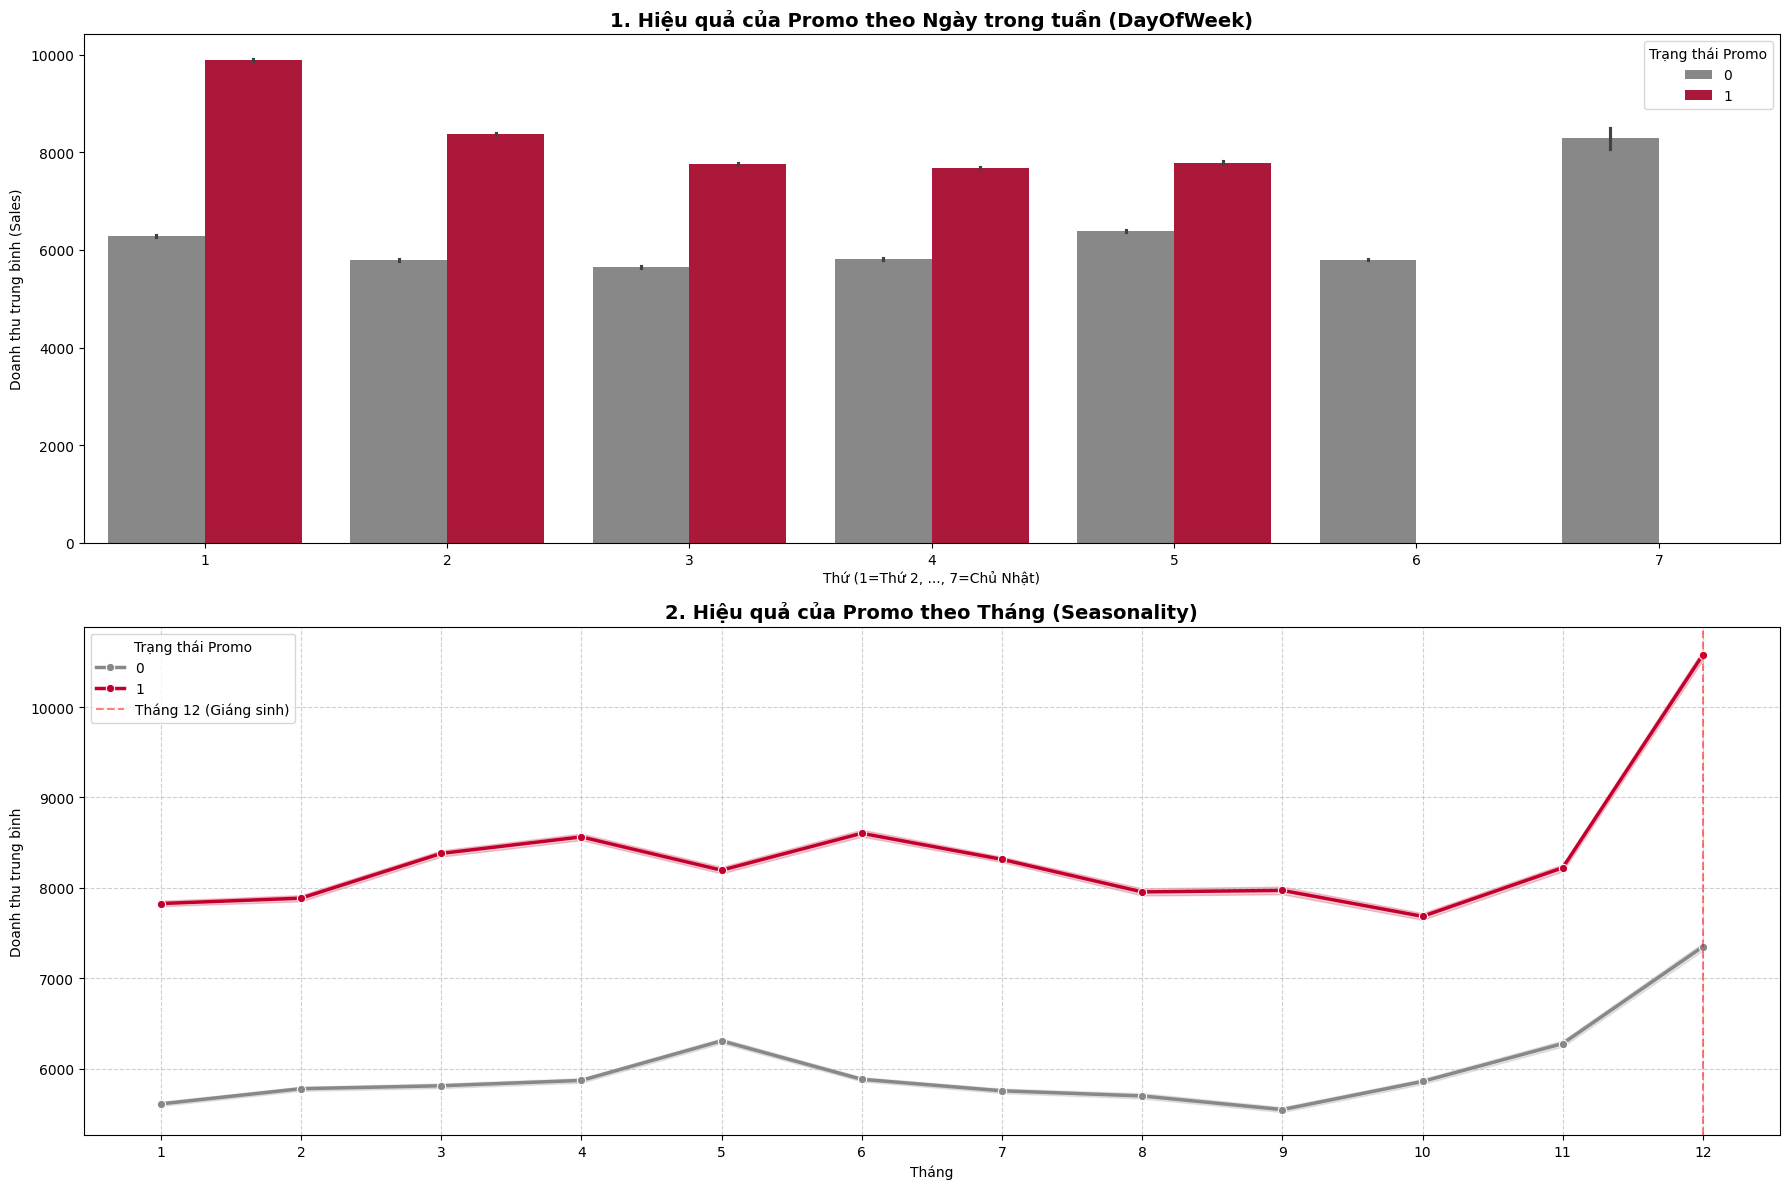

In [ ]:
import pandas as pd

df_open['Month'] = df_open['Date'].dt.month

# ---  PHÂN TÍCH HIỆU QUẢ PROMO (TEXT REPORT) ---
print("\n" + "="*50)
print("BÁO CÁO PHÂN TÍCH: THỜI ĐIỂM ÁP DỤNG PROMO TỐT NHẤT")
print("="*50)

# ---------------------------------------------------------
# PHẦN A: PHÂN TÍCH THEO NGÀY TRONG TUẦN (DayOfWeek)
# ---------------------------------------------------------
# Tính trung bình Sales theo từng ngày, tách riêng có Promo (1) và ko Promo (0)
day_summary = df_open.groupby(['DayOfWeek', 'Promo'])['Sales'].mean().unstack()

# Đổi tên cột cho dễ hiểu
day_summary.columns = ['No_Promo_Avg', 'Promo_Avg']

# Tính mức tăng trưởng tuyệt đối và phần trăm (%)
day_summary['Growth_Abs'] = day_summary['Promo_Avg'] - day_summary['No_Promo_Avg']
day_summary['Growth_Pct'] = (day_summary['Growth_Abs'] / day_summary['No_Promo_Avg']) * 100

# Sắp xếp theo mức tăng trưởng % giảm dần
top_days_growth = day_summary.sort_values(by='Growth_Pct', ascending=False)

print("\n[A] HIỆU QUẢ THEO NGÀY TRONG TUẦN:")
print(day_summary[['No_Promo_Avg', 'Promo_Avg', 'Growth_Pct']].round(2))

best_day = top_days_growth.index[0]
best_growth = top_days_growth.iloc[0]['Growth_Pct']
print(f"\n=> KẾT LUẬN NGÀY: Promo hiệu quả nhất vào Thứ {best_day} (Tăng trưởng {best_growth:.2f}%)")

# ---------------------------------------------------------
# PHẦN B: PHÂN TÍCH THEO THÁNG (Seasonality)
# ---------------------------------------------------------
month_summary = df_open.groupby(['Month', 'Promo'])['Sales'].mean().unstack()
month_summary.columns = ['No_Promo_Avg', 'Promo_Avg']

month_summary['Growth_Abs'] = month_summary['Promo_Avg'] - month_summary['No_Promo_Avg']
month_summary['Growth_Pct'] = (month_summary['Growth_Abs'] / month_summary['No_Promo_Avg']) * 100

# Tìm 3 tháng có mức tăng trưởng cao nhất
top_3_months = month_summary.sort_values(by='Growth_Pct', ascending=False).head(3)

print("\n" + "-"*30)
print("[B] TOP 3 THÁNG CÓ PROMO HIỆU QUẢ NHẤT:")
print(top_3_months[['No_Promo_Avg', 'Promo_Avg', 'Growth_Pct']].round(2))

print(f"\n=> KẾT LUẬN THÁNG: Nên đẩy mạnh Promo vào các tháng: {list(top_3_months.index)}")

print("="*50)# --- 2. VISUALIZATION (Vẽ biểu đồ) ---
plt.figure(figsize=(18, 12))

# --- BIỂU ĐỒ 1: Hiệu quả Promo theo Ngày trong tuần (DayOfWeek) ---
plt.subplot(2, 1, 1)
# Dùng Barplot để so sánh trực tiếp mức Sales trung bình
sns.barplot(x='DayOfWeek', y='Sales', hue='Promo', data=df_open, palette=PROMO_PALETTE)

plt.title('1. Hiệu quả của Promo theo Ngày trong tuần (DayOfWeek)', fontsize=14, fontweight='bold')
plt.xlabel('Thứ (1=Thứ 2, ..., 7=Chủ Nhật)')
plt.ylabel('Doanh thu trung bình (Sales)')
plt.legend(title='Trạng thái Promo')

# --- BIỂU ĐỒ 2: Hiệu quả Promo theo Tháng (Seasonality) ---
plt.subplot(2, 1, 2)
# Dùng Lineplot để thấy xu hướng biến động và khoảng cách (gap) giữa 2 đường
sns.lineplot(x='Month', y='Sales', hue='Promo', data=df_open,
             marker='o', palette=PROMO_PALETTE, linewidth=2.5)

# Đánh dấu các tháng đặc biệt (Ví dụ: Tháng 12)
plt.axvline(x=12, color='red', linestyle='--', alpha=0.5, label='Tháng 12 (Giáng sinh)')

plt.title('2. Hiệu quả của Promo theo Tháng (Seasonality)', fontsize=14, fontweight='bold')
plt.xlabel('Tháng')
plt.ylabel('Doanh thu trung bình')
plt.xticks(range(1, 13)) # Hiển thị đủ từ tháng 1 đến 12
plt.legend(title='Trạng thái Promo')
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


**- Quy luật Thứ Hai**: Thứ 7,chủ nhật ở Đức, mọi cửa hàng đều đóng cửa( Trừ cửa hàng "b").Sau khoảng nghỉ không mua sắm, nhu cầu tiêu dùng bị "nén" lại như một chiếc lò xo Đây là lúc các hộ gia đình nhận ra họ đã hết những thứ thiết yếu nhất
-> Thứ Hai trở thành ngày "Cứu trợ". Khách hàng đến Rossmann không phải để dạo chơi, họ đến để lấp đầy kho dự trữ.

Khi Rossmann tung khuyến mãi vào đúng "điểm rơi" này, nó giống như châm lửa vào thùng dầu. Khách hàng không chỉ mua món đồ họ cần, mà khuyến mãi khiến họ mua nhiều hơn dự kiến. Đây là lý do doanh số Promo ngày Thứ 2 đạt mức kỷ lục (~9.890 đơn vị), bỏ xa các ngày khác.

Ngược lại,nhìn vào Thứ 6 (Day 5). Tăng trưởng chỉ đạt 21.92%. Tại sao? Vì Thứ 6 là ngày người ta buộc phải mua đồ để chuẩn bị cho cuối tuần. Dù có khuyến mãi hay không, họ vẫn sẽ mua. Do đó, tung Promo vào Thứ 6 mang lại hiệu quả tăng thêm thấp nhất.

**- "Mùa Hè Sôi Động":**
Dữ liệu chỉ ra 3 tháng vàng: Tháng 4, Tháng 6, và Tháng 7 với mức tăng trưởng xấp xỉ 45-46%.

- Tháng 4 (Giao mùa & Lễ Phục Sinh): Đây là lúc người Đức bắt đầu ra ngoài nhiều hơn sau mùa đông. Tháng 4 thường gắn liền với Lễ Phục Sinh (Ostern). Các chương trình khuyến mãi cho bánh kẹo, quà tặng và đồ trang trí hoạt động cực kỳ hiệu quả.

- Tháng 6 & 7 (Mùa du lịch & Nắng nóng): Đây là cao điểm mùa hè.

 - - Người dân chuẩn bị cho các kỳ nghỉ dài (Urlaub).

- - Nhu cầu tăng đột biến cho: Kem chống nắng, sản phẩm chăm sóc da, vitamin và các vật dụng du lịch cỡ nhỏ (travel size).

- - Promo đánh vào tâm lý "mua tích trữ trước khi đi chơi" của khách hàng đã thắng lớn.

In [ ]:
#FEATURE ENGINEERING TRƯỚC LỄ VÀ SAU LỄ ( VÌ STATE HOLIDAY CỬA HÀNG ĐÓNG CỬA)
#1. Đảm bảo dữ liệu đã được sắp xếp để dùng hàm shift chính xác
df_merge = df_merge.sort_values(['Store', 'Date'])

# 2. Chuẩn hóa cột StateHoliday (chuyển hết về string để tránh lỗi 0 và '0')
df_merge['StateHoliday'] = df_merge['StateHoliday'].astype(str)

# 2. THỐNG KÊ TRẠNG THÁI CỬA HÀNG VÀO NGÀY LỄ
# Kiểm tra xem vào các ngày lễ (a, b, c), có bao nhiêu cửa hàng mở cửa và bán được hàng?
holiday_analysis = df_merge.groupby('StateHoliday').agg(
    Total_Records=('Store', 'count'),
    Closed_Stores=('Open', lambda x: (x == 0).sum()),
    Zero_Sales=('Sales', lambda x: (x == 0).sum()),
    Mean_Sales=('Sales', 'mean')
)

print("--- THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO NGÀY LỄ ---")
print(holiday_analysis)

# THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO SCHOOL HOLIDAY
# SchoolHoliday: 0 = Ngày thường (đi học), 1 = Ngày nghỉ học (lễ, hè, đông...)

school_holiday_status = df_merge.groupby('SchoolHoliday').agg(
    Total_Records=('Store', 'count'),
    Closed_Stores=('Open', lambda x: (x == 0).sum()),
    Zero_Sales=('Sales', lambda x: (x == 0).sum()),
    Mean_Sales=('Sales', 'mean')
)

# Define 'groups' here to resolve NameError
groups = df_merge.groupby('Store')['StateHoliday']

# Lấy thông tin ngày lễ của 1, 2, 3 ngày tiếp theo
df_merge['Holiday_Next_1_Day'] = groups.shift(-1)
df_merge['Holiday_Next_2_Day'] = groups.shift(-2)
df_merge['Holiday_Next_3_Day'] = groups.shift(-3)

# 4. Tạo biến xác định "Vừa Hết Lễ" (Look-back / Backward looking)
# Lấy thông tin ngày lễ của 1, 2, 3 ngày trước đó
df_merge['Holiday_Prev_1_Day'] = groups.shift(1)
df_merge['Holiday_Prev_2_Day'] = groups.shift(2)
df_merge['Holiday_Prev_3_Day'] = groups.shift(3)

# 5. Tạo cờ (Flag) để phân loại ngày
# List các mã ngày lễ quan trọng: a (Public), b (Easter), c (Christmas)
# Lưu ý: '0' là ngày thường
holidays = ['a', 'b', 'c']

# a. Cờ "Sắp nghỉ lễ" (Pre-Holiday): Nếu 1 trong 3 ngày tới là lễ
def check_pre_holiday(row):
    if (row['Holiday_Next_1_Day'] in holidays) or \
       (row['Holiday_Next_2_Day'] in holidays) or \
       (row['Holiday_Next_3_Day'] in holidays):
        return 1
    return 0

# b. Cờ "Sau nghỉ lễ" (Post-Holiday): Nếu 1 trong 3 ngày trước là lễ
def check_post_holiday(row):
    if (row['Holiday_Prev_1_Day'] in holidays) or \
       (row['Holiday_Prev_2_Day'] in holidays) or \
       (row['Holiday_Prev_3_Day'] in holidays):
        return 1
    return 0

df_merge['Is_Pre_Holiday'] = df_merge.apply(check_pre_holiday, axis=1)
df_merge['Is_Post_Holiday'] = df_merge.apply(check_post_holiday, axis=1)

# Lọc lại data: Chỉ lấy những ngày MỞ CỬA để phân tích sức mua
df_analysis = df_merge[(df_merge['Open'] == 1) & (df_merge['Sales'] > 0)].copy()

print("Đã tạo xong các biến: Is_Pre_Holiday (Sắp nghỉ) và Is_Post_Holiday (Vừa nghỉ xong)")

--- THỐNG KÊ TRẠNG THÁI CỬA HÀNG THEO NGÀY LỄ ---
              Total_Records  Closed_Stores  Zero_Sales   Mean_Sales
StateHoliday                                                       
0                    854939         123357      123411  5992.479979
a                     16480          15837       15837   336.534163
b                      5610           5471        5471   247.478431
c                      3740           3671        3671   181.689305
Đã tạo xong các biến: Is_Pre_Holiday (Sắp nghỉ) và Is_Post_Holiday (Vừa nghỉ xong)


Chúng ta thường nghĩ: "Lễ tết người ta mua nhiều, hãy khuyến mãi trước lễ". Dữ liệu nói: Đừng làm vậy!


=== 2. HIỆU ỨNG TÍCH TRỮ TRƯỚC LỄ (PRE-HOLIDAY) ===
So sánh Doanh thu trung bình:
                   No_Promo        Promo     Uplift
Is_Pre_Holiday                                     
0               5863.490808  8237.765862  40.492518
1               6862.464974  9153.812962  33.389576


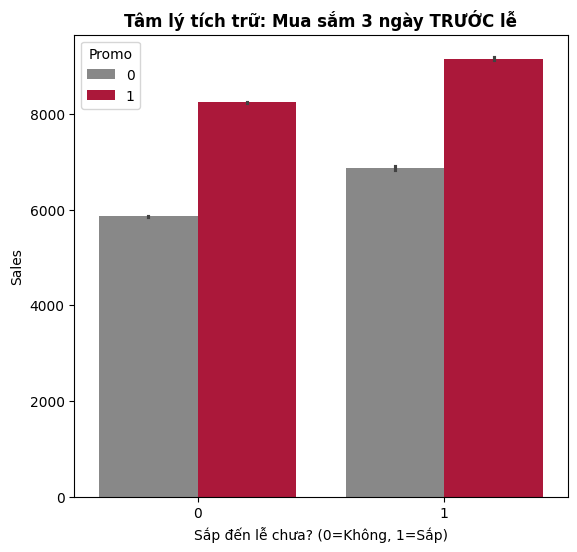

In [ ]:
# ---  HIỆU ỨNG TÍCH TRỮ (PRE-HOLIDAY STOCKPILING) ---
print("\n=== 2. HIỆU ỨNG TÍCH TRỮ TRƯỚC LỄ (PRE-HOLIDAY) ===")
# So sánh: Ngày thường (ko dính dáng lễ) vs Ngày Sắp Lễ
# Loại bỏ những ngày vừa là Pre vừa là Post để clean dữ liệu
df_clean = df_analysis[~((df_analysis['Is_Pre_Holiday']==1) & (df_analysis['Is_Post_Holiday']==1))]

pre_stats = df_clean.groupby(['Is_Pre_Holiday', 'Promo'])['Sales'].mean().unstack()
pre_stats.columns = ['No_Promo', 'Promo']
pre_stats['Uplift'] = ((pre_stats['Promo'] - pre_stats['No_Promo']) / pre_stats['No_Promo']) * 100

print("So sánh Doanh thu trung bình:")
print(pre_stats)

plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
sns.barplot(x='Is_Pre_Holiday', y='Sales', hue='Promo', data=df_clean, palette=PROMO_PALETTE)
plt.title('Tâm lý tích trữ: Mua sắm 3 ngày TRƯỚC lễ', fontsize=12, fontweight='bold')
plt.xlabel('Sắp đến lễ chưa? (0=Không, 1=Sắp)')
plt.ylabel('Sales')
plt.legend(title='Promo')

**Tâm lý trước lễ (Pre-Holiday)- "Mua vì cần, không phải vì rẻ"**

Ngay cả khi không có khuyến mãi (No_Promo), doanh thu trung bình đã tự động nhảy vọt lên 6.862 EUR (so với ngày thường chỉ 5.863 EUR). Khách hàng mua vì họ sợ thiếu đồ dùng trong kỳ nghỉ, nhu cầu là cấp thiết.

Cửa hàng vẫn chạy khuyến mãi, và doanh thu có tăng lên 9.153 EUR. Tuy nhiên, mức độ tăng trưởng (Uplift) chỉ đạt 33% (thấp hơn so với ngày thường là 40%).

Tại sao? Vì khách hàng đang ở chế độ "Mission-driven" (mua theo nhiệm vụ). Dù bạn có giảm giá hay không, họ vẫn sẽ mua chai dầu gội đó. Khuyến mãi lúc này chỉ là "phần thưởng thêm" chứ không phải động lực chính để họ rút ví.


=== 3. TÂM LÝ MUA SẮM SAU LỄ (POST-HOLIDAY) ===
                    No_Promo        Promo     Uplift
Is_Post_Holiday                                     
0                5877.509550  8284.402274  40.950894
1                6379.352555  9331.202773  46.271940


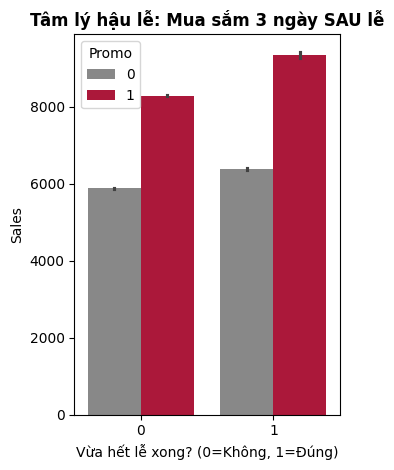

In [ ]:
# ---  HIỆU ỨNG HẬU LỄ (POST-HOLIDAY HANGOVER) ---
print("\n=== 3. TÂM LÝ MUA SẮM SAU LỄ (POST-HOLIDAY) ===")
post_stats = df_clean.groupby(['Is_Post_Holiday', 'Promo'])['Sales'].mean().unstack()
post_stats.columns = ['No_Promo', 'Promo']
post_stats['Uplift'] = ((post_stats['Promo'] - post_stats['No_Promo']) / post_stats['No_Promo']) * 100
print(post_stats)

plt.subplot(1, 2, 2)
sns.barplot(x='Is_Post_Holiday', y='Sales', hue='Promo', data=df_clean, palette=PROMO_PALETTE)
plt.title('Tâm lý hậu lễ: Mua sắm 3 ngày SAU lễ', fontsize=12, fontweight='bold')
plt.xlabel('Vừa hết lễ xong? (0=Không, 1=Đúng)')
plt.ylabel('Sales')
plt.legend(title='Promo')

plt.tight_layout()
plt.show()

**Tâm lý sau lễ (Post-Holiday) - "Thợ săn khuyến mãi"**

Nếu không có khuyến mãi, khách hàng chỉ mua cầm chừng. Doanh thu trung bình đạt 6.379 EUR (cao hơn ngày thường một chút do nhu cầu bổ sung hàng tiêu dùng nhanh đã hết, nhưng thấp hơn trước lễ).

Nhưng khi Rossmann tung ra các tờ rơi khuyến mãi, điều kỳ diệu xảy ra. Doanh thu vọt lên mức kỷ lục 9.331 EUR (cao nhất trong tất cả các kịch bản).Mức tăng trưởng (Uplift) đạt tới 46%

Tại sao? Khách hàng sau lễ rất nhạy cảm về giá. Họ cần mua lại kem đánh răng, bột giặt, tã bỉm... nhưng họ chờ đợi một lý do để cảm thấy mình đang chi tiêu thông minh. Biển báo "Sale" chính là lý do đó.


### C. Chiến thuật Địa lý: Phòng thủ và Tấn công


--- HIỆU QUẢ PROMO THEO KHOẢNG CÁCH ĐỐI THỦ (Competition Distance) ---
                    No_Promo        Promo  Uplift_Pct     Abs_Diff
Competition_Bin                                                   
Rất gần (<500m)  6513.964242  9111.447037   39.875607  2597.482795
Gần (500m-3km)   5894.868294  8064.945961   36.812997  2170.077667
Xa (3km-10km)    5795.654898  8040.187309   38.727848  2244.532411
Rất xa (>10km)   5602.757308  8273.783118   47.673416  2671.025810


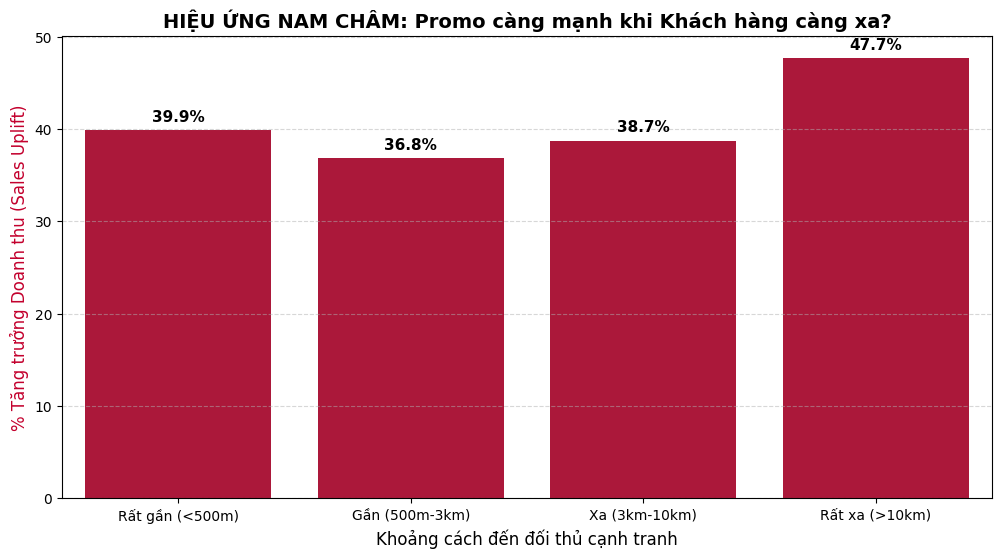

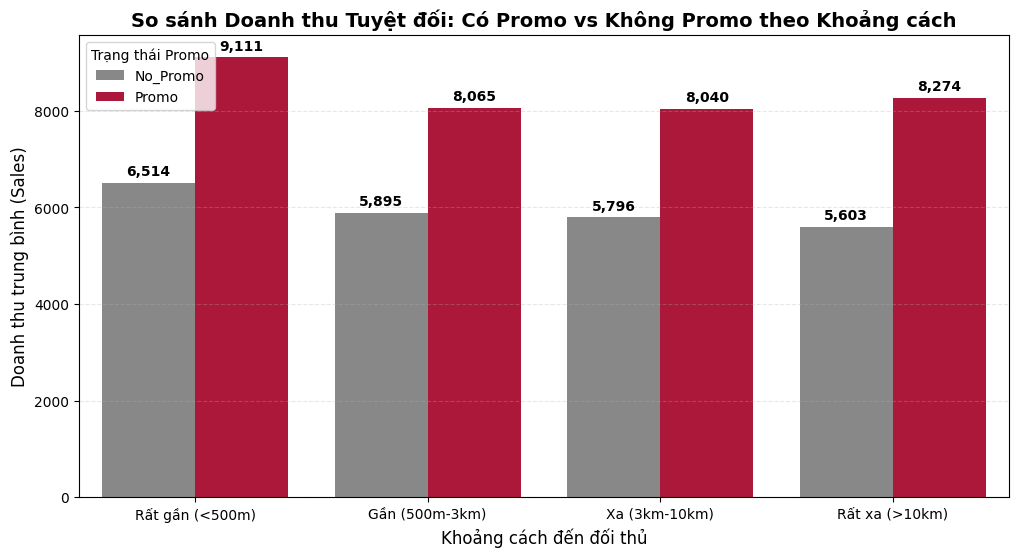


BẢNG PHÂN TÍCH CHI TIẾT: DOANH THU TUYỆT ĐỐI (TRUNG BÌNH)
Nhóm Khoảng Cách          | Ko Promo (Sales)   | Có Promo (Sales)   | Chênh lệch  
--------------------------------------------------------------------------------
Rất gần (<500m)           | 6,514             | 9,111             | +2,597
Gần (500m-3km)            | 5,895             | 8,065             | +2,170
Xa (3km-10km)             | 5,796             | 8,040             | +2,245
Rất xa (>10km)            | 5,603             | 8,274             | +2,671
--------------------------------------------------------------------------------


In [ ]:
# --- XỬ LÝ DỮ LIỆU & CHIA NHÓM KHOẢNG CÁCH ---

# 1. Xử lý giá trị thiếu (nếu có) của CompetitionDistance bằng trung vị
# (Median an toàn hơn Mean vì khoảng cách thường có outliers rất lớn)
df_open = df_merge[df_merge['Open'] == 1].copy()
median_dist = df_open['CompetitionDistance'].median()
df_open['CompetitionDistance'].fillna(median_dist, inplace=True)

# 2. Chia nhóm (Binning) Khoảng cách
# Chúng ta chia theo logic kinh doanh thực tế:
# - < 500m: Rất gần (Cạnh tranh gay gắt)
# - 500m - 3000m: Gần (Vùng ảnh hưởng trực tiếp)
# - 3000m - 10000m: Xa (Ít ảnh hưởng)
# - > 10000m: Rất xa (Gần như độc quyền khu vực)

bins = [0, 500, 3000, 10000, float('inf')]
labels = ['Rất gần (<500m)', 'Gần (500m-3km)', 'Xa (3km-10km)', 'Rất xa (>10km)']

df_open['Competition_Bin'] = pd.cut(df_open['CompetitionDistance'], bins=bins, labels=labels)
# ---  TÍNH TOÁN SALES UPLIFT THEO NHÓM ---

# Groupby theo Bin và Promo
comp_stats = df_open.groupby(['Competition_Bin', 'Promo'])['Sales'].mean().unstack()
comp_stats.columns = ['No_Promo', 'Promo']

# Tính % Tăng trưởng (Uplift)
comp_stats['Uplift_Pct'] = ((comp_stats['Promo'] - comp_stats['No_Promo']) / comp_stats['No_Promo']) * 100
comp_stats['Abs_Diff'] = comp_stats['Promo'] - comp_stats['No_Promo']

print("\n--- HIỆU QUẢ PROMO THEO KHOẢNG CÁCH ĐỐI THỦ (Competition Distance) ---")
print(comp_stats)

# --- 1. TRỰC QUAN HÓA: % UPLIFT ---
fig, ax1 = plt.subplots(figsize=(12, 6))

# [SỬA ĐỔI]: Thay palette=MAIN_COLOR thành color=MAIN_COLOR
# Lý do: Khi muốn tô 1 màu đồng nhất, dùng tham số 'color' chuẩn xác hơn 'palette'.
sns.barplot(x=comp_stats.index, y=comp_stats['Uplift_Pct'], color=MAIN_COLOR, ax=ax1)

# Trang trí biểu đồ
ax1.set_title('HIỆU ỨNG NAM CHÂM: Promo càng mạnh khi Khách hàng càng xa?', fontsize=14, fontweight='bold')
ax1.set_ylabel('% Tăng trưởng Doanh thu (Sales Uplift)', fontsize=12, color=PROMO_PALETTE[1]) # Dùng màu xanh lá cho chữ trục tung để đồng bộ
ax1.set_xlabel('Khoảng cách đến đối thủ cạnh tranh', fontsize=12)

# Hiển thị giá trị lên cột
for index, value in enumerate(comp_stats['Uplift_Pct']):
    ax1.text(index, value + 1, f"{value:.1f}%", ha='center', fontsize=11, fontweight='bold')

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


# --- 2. TRỰC QUAN HÓA: SO SÁNH DOANH THU TUYỆT ĐỐI ---

plt.figure(figsize=(12, 6))

# Chuẩn bị dữ liệu cho biểu đồ (Melt)
# Lưu ý: Cột của comp_stats đang là ['No_Promo', 'Promo']
df_melt = comp_stats[['No_Promo', 'Promo']].reset_index().melt(
    id_vars='Competition_Bin',
    var_name='Promo_Status',
    value_name='Avg_Sales'
)

# [SỬA ĐỔI QUAN TRỌNG]: Tạo Palette ánh xạ từ tên cột sang màu chuẩn
# Vì cột dữ liệu là chữ ('No_Promo', 'Promo') nhưng PROMO_PALETTE dùng key số (0, 1)
chart_palette = {
    'No_Promo': PROMO_PALETTE[0], # Lấy màu xám
    'Promo':    PROMO_PALETTE[1]  # Lấy màu xanh lá
}

# Vẽ biểu đồ
ax2 = sns.barplot(
    data=df_melt,
    x='Competition_Bin',
    y='Avg_Sales',
    hue='Promo_Status',
    palette=chart_palette # [SỬA ĐỔI]: Áp dụng palette mới tạo
)

plt.title('So sánh Doanh thu Tuyệt đối: Có Promo vs Không Promo theo Khoảng cách', fontsize=14, fontweight='bold')
plt.ylabel('Doanh thu trung bình (Sales)', fontsize=12)
plt.xlabel('Khoảng cách đến đối thủ', fontsize=12)
plt.legend(title='Trạng thái Promo')

# Hiển thị giá trị lên từng cột
for p in ax2.patches:
    if p.get_height() > 0:
        # Chọn màu chữ dựa trên độ cao cột (tùy chọn nâng cao) hoặc để mặc định đen
        ax2.annotate(f'{p.get_height():,.0f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 8),
                     textcoords='offset points', fontsize=10, fontweight='bold', color='black')

plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# --- PHẦN BỔ SUNG: IN OUTPUT CHI TIẾT ---
print("\n" + "="*70)
print("BẢNG PHÂN TÍCH CHI TIẾT: DOANH THU TUYỆT ĐỐI (TRUNG BÌNH)")
print("="*70)
print(f"{'Nhóm Khoảng Cách':<25} | {'Ko Promo (Sales)':<18} | {'Có Promo (Sales)':<18} | {'Chênh lệch':<12}")
print("-" * 80)

for index, row in comp_stats.iterrows():
    no_promo = row['No_Promo']
    promo = row['Promo']
    diff = row['Abs_Diff']
    # In ra với định dạng số có dấu phẩy ngăn cách hàng nghìn
    print(f"{index:<25} | {no_promo:,.0f}             | {promo:,.0f}             | +{diff:,.0f}")

print("-" * 80)


- **Vùng "Tử chiến" (<500m):** Promo là vũ khí phòng thủ
Tại khu vực này, Lượng khách tăng tới 21.5% khi có Promo.
 Đối thủ ở ngay sát vách. Khách hàng có thể dễ dàng đi bộ sang hàng xóm nếu thấy giá rẻ hơn.
 Promo ở đây không hẳn để "tăng trưởng", mà là để "giành giật & giữ chân". Nếu bạn không chạy Promo, khách hàng sẽ lập tức bị đối thủ hút mất. Đây là cuộc chiến sống còn về thị phần tại chỗ.

- **Vùng "Độc quyền" (>10km):** Promo là nam châm hút khách
Đây là nơi Promo tỏa sáng nhất với lượng khách tăng vọt 27%.
 Cửa hàng nằm ở khu vực thưa thớt, bán kính phục vụ rộng.
Khách hàng phải di chuyển xa để mua sắm. Họ sẽ không đi 10km chỉ để mua một món đồ giá thường. Nhưng khi có Promo, nó tạo ra một "Lý do đủ lớn" để họ thực hiện chuyến đi. Promo biến cửa hàng thành một điểm đến (Destination), kích hoạt hành vi "đi một lần mua cho bõ".

- **Vùng "Lưng chừng" (500m - 10km):**
Tại sao hiệu quả ở đây lại thấp nhất (18.8%)?
 Không đủ gần để hút khách đi bộ tiện đường như nhóm <500m. Cũng không đủ độc quyền để khách hàng chấp nhận đi xa như nhóm >10km.
Khách hàng ở đây có nhiều lựa chọn thay thế nhưng lại không nằm tập trung, khiến tác động của Promo bị loãng đi.

## 3.BONGO

### --- CHIẾN LƯỢC ---

**1. STORETYPE**

Ngừng toàn bộ Promo truyền thống tại Store 'b': Không chạy các chương trình giảm giá đại trà như các cửa hàng phố.

Chiến lược thay thế: Tập trung vào Tốc độ & Sự sẵn có (Availability). Đảm bảo quầy kệ luôn đầy ắp các mặt hàng tiện lợi (nước, khăn giấy, đồ ăn nhanh). Có thể bán các Combo tiện lợi (VD: Nước + Snack) thay vì giảm giá đơn lẻ.

Dồn ngân sách cho Store 'a' & 'd': Chuyển toàn bộ ngân sách Promo tiết kiệm được từ Store 'b' sang Store 'a' (Khu dân cư) và Store 'd' - nơi khách hàng cực kỳ nhạy cảm với giá và phản ứng mạnh với khuyến mãi (+48%).

**2.ASSORTMENT**
Promo tập trung vào "Rổ hàng cơ bản( a - Basic) ": 80% ngân sách khuyến mãi nên dành cho các mặt hàng Basic (Kem đánh răng, bột giặt, dầu gội, tã bỉm...). Đây là những "Traffic Driver" (sản phẩm kéo khách) tốt nhất.

Chiến thuật Cross-sell: Không giảm giá trực tiếp hàng Extra (Mỹ phẩm cao cấp, nước hoa...) mà sử dụng hàng Basic làm mồi nhử. Ví dụ: Mua đơn hàng Basic trên 20 EUR được quyền mua hàng Extra giảm giá. Điều này tránh việc giảm giá vô ích cho hàng Extra khi khách chưa có nhu cầu.

**3.THỜI ĐIỂM**

Chiến dịch "Manic Monday": Tung các Deal sốc nhất, giới hạn số lượng vào ngày Thứ 2 để tận dụng đà mua sắm sau ngày nghỉ. Biến Thứ 2 thành thói quen mua sắm định kỳ.

Cắt giảm Promo ngày Thứ 6: Giữ giá bán thường hoặc khuyến mãi nhẹ vào Thứ 6, vì khách hàng kiểu gì cũng phải mua đồ cho cuối tuần.

Chiến thuật Lễ hội 2 giai đoạn:

Giai đoạn Trước lễ (Pre-holiday): Tập trung vào Bundle (Combo) và sự tiện lợi. Thông điệp: "Đủ đồ cho chuyến đi trọn vẹn". Không cần giảm giá sâu.

Giai đoạn Sau lễ (Post-holiday): Tung ra Deep Discount (Giảm giá sâu) để kích thích khách hàng Restock (mua đầy lại kho) nhu yếu phẩm. Đây là lúc khách hàng cần lý do để chi tiền nhất.

**4.VỊ TRÍ ĐỊA LÝ**

Vùng Tử chiến (<500m) - Chiến lược Phòng thủ: Chạy Promo tần suất dày đặc (High Frequency), thay đổi liên tục để giữ chân khách hàng. Sử dụng các chương trình khách hàng thân thiết (Loyalty) để họ không bước sang cửa hàng đối thủ. Giá phải cạnh tranh nhất tại đây.

Vùng Độc quyền (>10km) - Chiến lược Nam châm: Không cần giảm giá lắt nhắt. Hãy tổ chức các đợt "Big Sale" định kỳ (theo tháng/quý) để tạo động lực cho khách hàng đi xa một lần và mua số lượng lớn (Bulk buy). Promo ở đây phải đủ lớn để bù đắp chi phí đi lại của khách.

Vùng Lưng chừng (500m - 10km): Tối ưu hóa chi phí bằng cách giảm bớt ngân sách Promo tại đây. Chỉ chạy các chiến dịch lớn toàn chuỗi (Mass campaign), không chạy các Promo cục bộ tốn kém.



## PROMO2 -" CUỘC CHIẾN SINH TỒN"


## 1.BING

-Promo2 không phải là một công cụ tấn công ngắn hạn, mà là một "tấm khiên phòng thủ" dài hạn dành cho những cửa hàng đang chịu áp lực cạnh tranh gay gắt. Tuy nhiên, chiến lược này không dành cho tất cả. Để thành công, chúng ta cần một sự kiên nhẫn tài chính trên 5 năm và sự tàn nhẫn cần thiết để "cắt bỏ" những phân khúc đang "đốt tiền" vô ích.

Chúng ta sẽ đi qua 3 điểm chính:

Bối cảnh: Tại sao chúng ta buộc phải tham gia cuộc chiến này?

Thời gian: Sức mạnh của lãi suất kép sau 5 năm.

Chọn lọc: Ai nên giữ lại và ai cần loại bỏ ngay lập tức?

## 2.BANG

### A.Bối cảnh: Vùng chiến sự ác liệt

###Ai đang tham gia PROMO2?

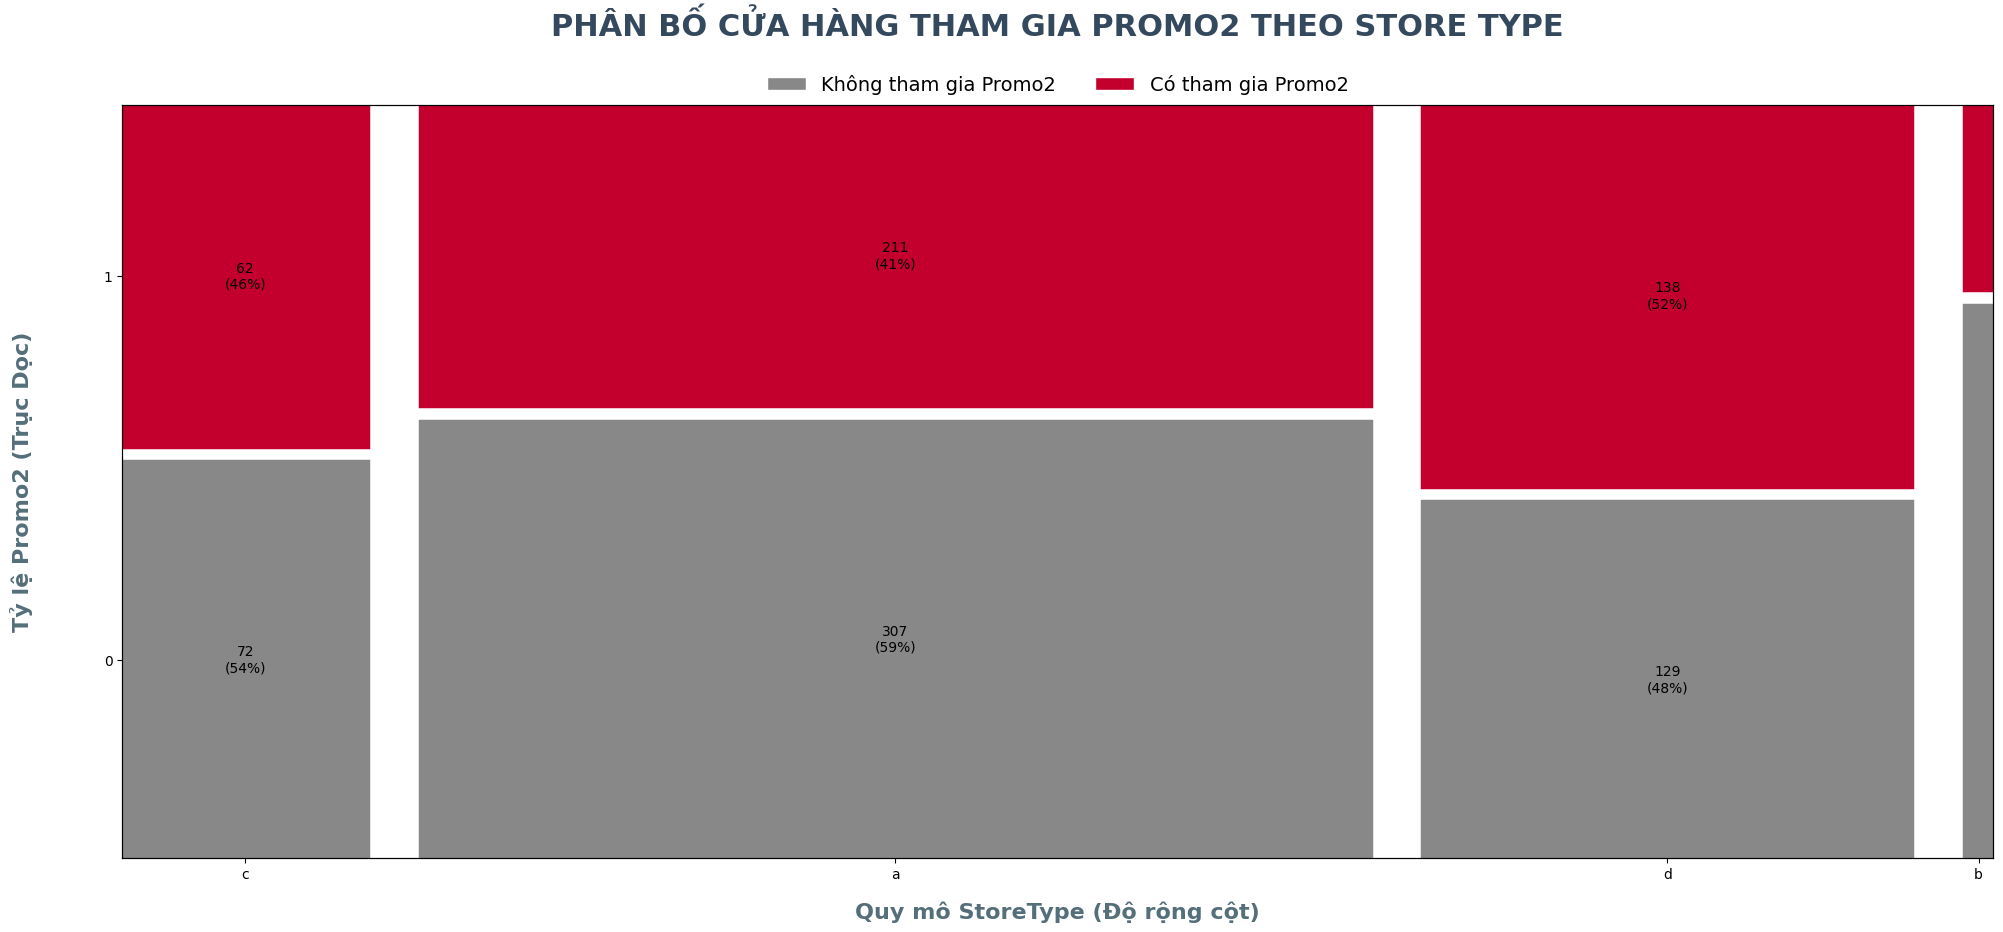


--- BẢNG CHI TIẾT SỐ LIỆU VỀ % CÁC CỬA HÀNG THAM GIA PROMO2 ---
Promo2       0    1  Total  % Tham Gia
StoreType                             
a          307  211    518        40.7
b           12    4     16        25.0
c           72   62    134        46.3
d          129  138    267        51.7


In [ ]:
import matplotlib.patches as mpatches
from statsmodels.graphics.mosaicplot import mosaic

# df_unique_stores is already created in the notebook context
df_unique_stores = df_open.drop_duplicates(subset=['Store'])[['Store', 'StoreType', 'Promo2']]

# Tính toán số liệu cơ bản
crosstab = pd.crosstab(df_unique_stores['StoreType'], df_unique_stores['Promo2'])
store_type_totals = df_unique_stores['StoreType'].value_counts()
total_stores = len(df_unique_stores)

# --- 2. HÀM TẠO NHÃN THÔNG MINH (SMART LABELIZER) ---
def smart_labelizer(key):
    st_type = key[0]
    p2_status = int(key[1]) # Chuyển đổi sang int để dùng cho crosstab

    count = crosstab.loc[st_type, p2_status]
    pct_in_group = (count / store_type_totals[st_type]) * 100
    global_share = count / total_stores

    # QUY TẮC HIỂN THỊ ĐỂ TRÁNH ĐÈ CHỮ:
    # 1. Nếu ô chiếm dưới 1.5% tổng thể: Ẩn hoàn toàn
    if global_share < 0.015:
        return ""
    # 2. Nếu ô nhỏ (dưới 5%): Chỉ hiện % cho gọn
    elif global_share < 0.05:
        return f"{count}\n({pct_in_group:.0f}%)"
    # 3. Các ô lớn: Hiện đầy đủ
    else:
        return f"{count}\n({pct_in_group:.0f}%)"

# --- 3. THIẾT LẬP VÀ VẼ BIỂU ĐỒ ---
fig, ax = plt.subplots(figsize=(20, 10))
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 12 # Tăng nhẹ cỡ chữ mặc định

# Định nghĩa màu sắc: Một bảng màu hiện đại, tương phản tốt
colors = {
    '0': ROSSMANN_GREY,  # Xám trung tính (Không tham gia)
    '1': ROSSMANN_RED    # Đỏ Rossmann (Có tham gia)
}

props = lambda key: {
    'color': colors[key[1]],
    'alpha': 1.0,
    'edgecolor': 'white',
    'linewidth': 2.5 # Tăng độ dày đường viền để rõ hơn
}

# Vẽ Mosaic
mosaic(df_unique_stores, ['StoreType', 'Promo2'],
       title='', # Bỏ title ở đây để custom bên ngoài
       labelizer=smart_labelizer,
       properties=props,
       gap=0.03,
       ax=ax,
       label_rotation=0
      )

# --- 4. TRANG TRÍ (TITLE, LEGEND, AXIS) ---
# Tiêu đề
ax.set_title('PHÂN BỐ CỬA HÀNG THAM GIA PROMO2 THEO STORE TYPE',
             fontsize=22, fontweight='bold', pad=50, color='#34495E') # Màu tối hơn cho tiêu đề

# Xóa khung viền thừa
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# Thêm nhãn trục thủ công
ax.text(-0.06, 0.5, 'Tỷ lệ Promo2 (Trục Dọc)', rotation=90, va='center',
        fontsize=16, color='#546E7A', fontweight='bold')
ax.text(0.5, -0.08, 'Quy mô StoreType (Độ rộng cột)', ha='center',
        fontsize=16, color='#546E7A', fontweight='bold')

# Legend (Chú thích)
no_promo_patch = mpatches.Patch(facecolor=colors['0'], edgecolor='white', label='Không tham gia Promo2')
promo_patch = mpatches.Patch(facecolor=colors['1'], edgecolor='white', label='Có tham gia Promo2')
ax.legend(handles=[no_promo_patch, promo_patch],
          loc='upper center', bbox_to_anchor=(0.5, 1.08), # Đặt legend cao hơn chút
          ncol=2, fontsize=14, frameon=False, borderpad=1) # Tăng borderpad

plt.tight_layout(rect=[0, 0, 1, 0.95]) # Điều chỉnh rect để accommodate legend và title
plt.show()

# --- 5. IN BẢNG PHỤ TRỢ (QUAN TRỌNG) ---
# Vì ta đã ẩn số liệu của các ô nhỏ (như StoreType b), ta cần in bảng ra để không mất thông tin
print("\n--- BẢNG CHI TIẾT SỐ LIỆU VỀ % CÁC CỬA HÀNG THAM GIA PROMO2 ---")
summary_table = pd.crosstab(df_unique_stores['StoreType'], df_unique_stores['Promo2'])
summary_table['Total'] = summary_table.sum(axis=1)
summary_table['% Tham Gia'] = (summary_table[1] / summary_table['Total'] * 100).round(1)
print(summary_table)


### Tuy nhiên họ không có quyền được lựa chọn MUỐN hay KHÔNG MUỐN tham gia PROMO2, mà là họ BUỘC PHẢI tham gia. Bởi vì:

--- KIỂM TRA GIẢ THUYẾT CẠNH TRANH ---
        count         mean          std   min    25%     50%     75%      max
Promo2                                                                       
0       542.0  6549.520295  9374.321188  30.0  992.5  2640.0  8105.0  75860.0
1       570.0  4316.508772  5354.788891  20.0  575.0  2210.0  5590.0  27190.0


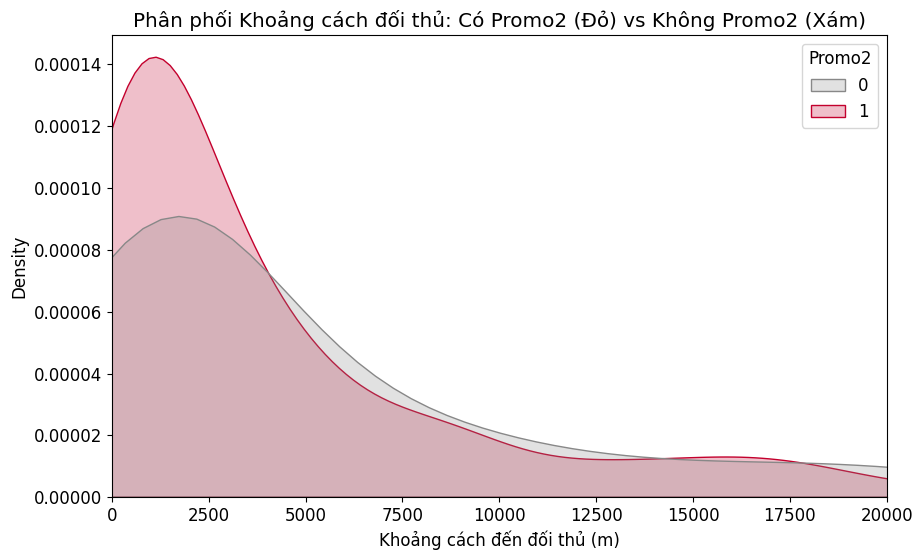


--- MA TRẬN STORE TYPE VÀ ASSORTMENT ---
Assortment    a  b    c
StoreType              
a           381  0  221
b             7  9    1
c            77  0   71
d           128  0  220


In [ ]:
print("--- KIỂM TRA GIẢ THUYẾT CẠNH TRANH ---")

# 1. So sánh khoảng cách đối thủ giữa nhóm Promo2 vs Non-Promo2
comp_dist_stats = store.groupby('Promo2')['CompetitionDistance'].describe()
print(comp_dist_stats)

# Tạo bảng màu tùy chỉnh: 0 là Xám, 1 là Đỏ
custom_palette = {0: ROSSMANN_GREY, 1: ROSSMANN_RED}

# 2. Vẽ biểu đồ phân phối
plt.figure(figsize=(10, 6))

# SỬA Ở ĐÂY: Thay palette="muted" thành palette=custom_palette
sns.kdeplot(data=store,
            x='CompetitionDistance',
            hue='Promo2',
            common_norm=False,
            fill=True,
            palette=custom_palette)

plt.title('Phân phối Khoảng cách đối thủ: Có Promo2 (Đỏ) vs Không Promo2 (Xám)')
plt.xlim(0, 20000) # Zoom vào vùng khoảng cách gần
plt.xlabel('Khoảng cách đến đối thủ (m)')
plt.show()

# 3. Kiểm tra chéo
print("\n--- MA TRẬN STORE TYPE VÀ ASSORTMENT ---")
print(pd.crosstab(store['StoreType'], store['Assortment']))

Khi phân tích khoảng cách đối thủ (CompetitionDistance), dữ liệu cho thấy các cửa hàng tham gia Promo2 đang ở thế "lưng dựa tường".

- **Nhóm KHÔNG tham gia Promo2**: Đối thủ ở rất xa (trung bình **6,550m**). Họ đang ở vùng an toàn.

- **Nhóm CÓ tham gia Promo2:** Đối thủ ở ngay sát vách (trung bình **4,316m**).

=> Các cửa hàng tham gia Promo2 đang nằm trong "vùng chiến sự" ác liệt. Họ tìm đến Promo2 không hẳn để tấn công mở rộng, mà trước hết là một chiến lược phòng thủ (Defensive Strategy) để giữ chân khách hàng trước áp lực từ đối thủ.

### B.Thời gian: Cuộc đua marathon, không phải cú nước rút.

Nếu chỉ nhìn vào KPI theo quý, Promo2 đã bị "khai tử" từ lâu. Dữ liệu chứng minh một hành trình từ "đau đớn" đến "ngọt ngào":

In [ ]:
# --- 1. FEATURE ENGINEERING (Giữ nguyên logic tính thâm niên) ---
# Lọc dữ liệu chỉ lấy các cửa hàng có tham gia Promo2
df_p2 = df_open[df_open['Promo2'] == 1].copy()

# Tính thâm niên tham gia (Promo2 Tenure)
df_p2['SaleWeek'] = df_p2['Date'].dt.isocalendar().week
df_p2['Promo2_Tenure_Months'] = (
    (df_p2['Date'].dt.year - df_p2['Promo2SinceYear']) * 12 +
    (df_p2['SaleWeek'] - df_p2['Promo2SinceWeek']) / 4.33
)

# Lọc bỏ giá trị âm và chia nhóm thâm niên
df_p2 = df_p2[df_p2['Promo2_Tenure_Months'] > 0]
df_p2['Tenure_Group'] = pd.cut(df_p2['Promo2_Tenure_Months'],
                               bins=[0, 12, 24, 36, 48, 60, 100],
                               labels=['<1 Năm', '1-2 Năm', '2-3 Năm', '3-4 Năm', '4-5 Năm', '>5 Năm'])


 BÁO CÁO HIỆU QUẢ PROMO2 THEO THÂM NIÊN (vs BASELINE) 

[*] MỨC CHUẨN (BASELINE - Organic Sales): 6,306
    (Được tính từ: Ngày ko Promo + Cửa hàng ko tham gia Promo2)

Thâm Niên (Tenure) Doanh Thu TB Số Lượng Mẫu So với Baseline (Abs) So với Baseline (%)
      <1 Năm          6,305        53,229                -1               -0.02%      
     1-2 Năm          6,359        66,767               +53               +0.84%      
     2-3 Năm          6,591        61,101              +285               +4.52%      
     3-4 Năm          6,754        57,700              +448               +7.10%      
     4-5 Năm          6,907        35,668              +601               +9.53%      
      >5 Năm          7,339        16,390            +1,033              +16.38%      

------------------------------------------------------------


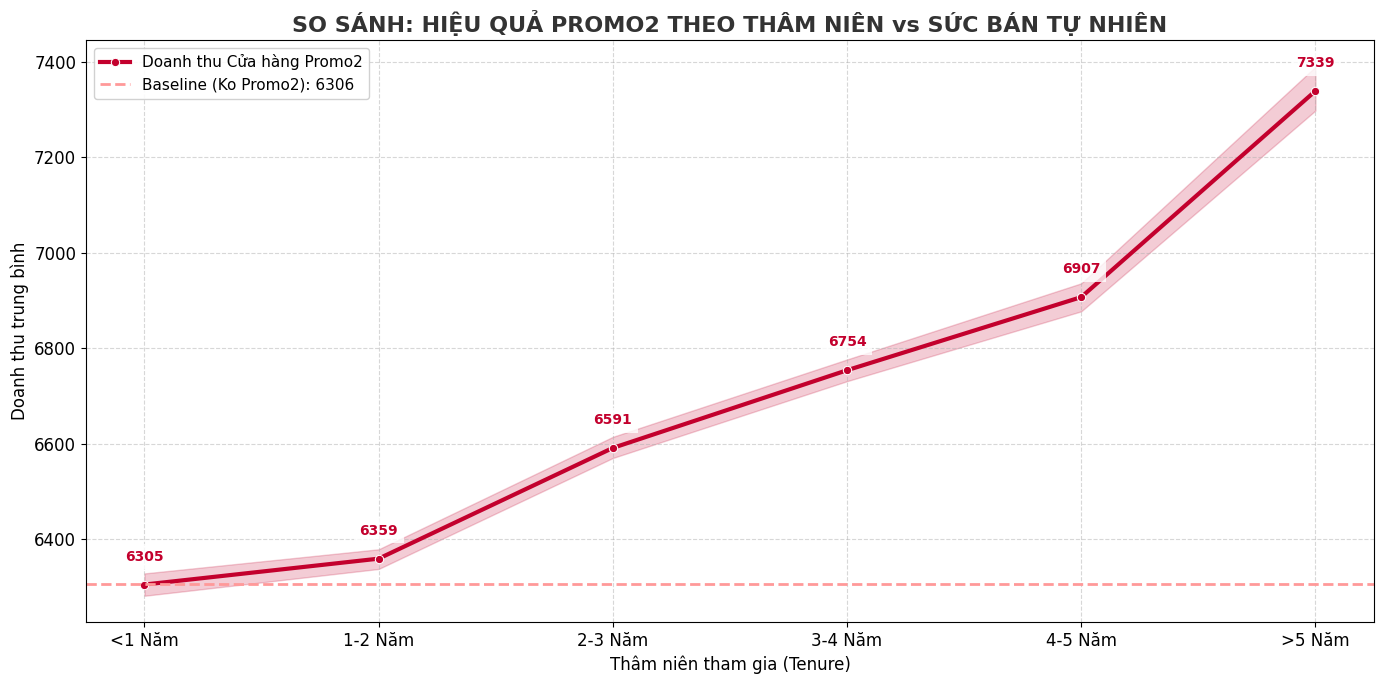

In [ ]:

# --- 2. TÍNH TOÁN BASELINE MỚI (PHẦN QUAN TRỌNG) ---

# Logic: Lấy trung bình doanh thu của những ngày:
# 1. Không có Promo thường (Promo == 0)
# 2. Cửa hàng KHÔNG tham gia Promo2 (Promo2 == 0)
# => Đây là "Sức bán tự nhiên" (Organic Sales) của hệ thống
mask_normal = (df_open['Promo'] == 0) & (df_open['Promo2'] == 0)
normal_sales_mean = df_open[mask_normal]['Sales'].mean()

# --- 4. IN KẾT QUẢ PHÂN TÍCH CHI TIẾT RA TERMINAL ---

print("\n" + "="*60)
print(" BÁO CÁO HIỆU QUẢ PROMO2 THEO THÂM NIÊN (vs BASELINE) ")
print("="*60)

# 1. Tổng hợp dữ liệu theo nhóm
# Tính thêm 'count' để xem độ tin cậy của dữ liệu (số lượng mẫu)
promo2_stats = df_p2.groupby('Tenure_Group', observed=False)['Sales'].agg(['mean', 'count']).reset_index()

# 2. Đổi tên cột cho dễ đọc
promo2_stats.columns = ['Thâm Niên (Tenure)', 'Doanh Thu TB', 'Số Lượng Mẫu']

# 3. Tính toán các chỉ số so sánh với Baseline (Sức bán tự nhiên)
promo2_stats['So với Baseline (Abs)'] = promo2_stats['Doanh Thu TB'] - normal_sales_mean
promo2_stats['So với Baseline (%)'] = (promo2_stats['So với Baseline (Abs)'] / normal_sales_mean) * 100

# 4. Định dạng hiển thị đẹp cho Terminal
# Tạo bản sao để format chuỗi (string) cho dễ đọc, giữ bản gốc để tính toán nếu cần
display_df = promo2_stats.copy()

display_df['Doanh Thu TB'] = display_df['Doanh Thu TB'].map('{:,.0f}'.format)
display_df['So với Baseline (Abs)'] = display_df['So với Baseline (Abs)'].map('{:+,.0f}'.format) # Thêm dấu +/-
display_df['So với Baseline (%)'] = display_df['So với Baseline (%)'].map('{:+.2f}%'.format)   # Thêm dấu +/- và %
display_df['Số Lượng Mẫu'] = display_df['Số Lượng Mẫu'].map('{:,.0f}'.format)

# 5. In thông tin Baseline trước
print(f"\n[*] MỨC CHUẨN (BASELINE - Organic Sales): {normal_sales_mean:,.0f}")
print("    (Được tính từ: Ngày ko Promo + Cửa hàng ko tham gia Promo2)\n")

# 6. In bảng chi tiết
# Sử dụng to_string để in toàn bộ bảng không bị cắt dòng
print(display_df.to_string(index=False, justify='center'))

print("\n" + "-"*60)



# --- 3. VẼ BIỂU ĐỒ ---

# --- ĐỊNH NGHĨA MÀU SẮC ---
# Giả định ROSSMANN_RED và ROSSMANN_GREY đã được định nghĩa trước đó.
# Nếu chưa, hãy bỏ comment các dòng dưới đây:
# ROSSMANN_RED = '#C3002D'  # Đỏ đậm thương hiệu
# ROSSMANN_GREY = '#7F7F7F' # Xám trung tính

# [MỚI] Định nghĩa màu đỏ nhạt cho Baseline theo yêu cầu
# Bạn có thể thay đổi mã hex này nếu muốn nhạt hơn hoặc đậm hơn một chút.
# Ví dụ khác: 'salmon', '#E57373', '#FFCDD2'
ROSSMANN_LIGHT_RED = '#FF9999'


fig, ax = plt.subplots(figsize=(14, 7))

# A. Vẽ đường xu hướng thâm niên của nhóm CÓ Promo2
sns.lineplot(x='Tenure_Group', y='Sales', data=df_p2,
             marker='o', color=ROSSMANN_RED, linewidth=3, label='Doanh thu Cửa hàng Promo2')

# B. Vẽ đường Baseline (Mức chuẩn)
# [ĐÃ SỬA] Thay đổi color từ ROSSMANN_GREY sang ROSSMANN_LIGHT_RED
plt.axhline(y=normal_sales_mean, color=ROSSMANN_LIGHT_RED, linestyle='--', linewidth=2,
            label=f'Baseline (Ko Promo2): {normal_sales_mean:.0f}')

# Trang trí
plt.title('SO SÁNH: HIỆU QUẢ PROMO2 THEO THÂM NIÊN vs SỨC BÁN TỰ NHIÊN', fontsize=16, fontweight='bold', color='#333333')
plt.xlabel('Thâm niên tham gia (Tenure)', fontsize=12)
plt.ylabel('Doanh thu trung bình', fontsize=12)
plt.legend(loc='upper left', fontsize=11, frameon=True, facecolor='white', framealpha=0.9)
plt.grid(True, linestyle='--', alpha=0.5)

# Thêm nhãn giá trị
group_means = df_p2.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)
for i, val in enumerate(group_means):
    if not pd.isna(val):
        ax.text(i, val + 50, f'{val:.0f}', horizontalalignment='center',
                 color=ROSSMANN_RED, fontweight='bold', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))

plt.tight_layout()
plt.show()

**1.Sự khởi đầu bất lợi (< 1 Năm)**
Dữ liệu: Doanh thu 6,305 (Thấp hơn mức chuẩn Organic 6,306 một chút, -0.02%).

Cửa hàng Rossman đăng kí tham gia promo 2 sẽ bất lợi ở thời điểm đầu :  Doanh thu không đổi, thậm chí thấp hơn 1 đơn vị so với không làm gì cả.

Tại sao? Khách hàng chưa quen với cơ chế mới. Chi phí vận hành tăng lên nhưng hiệu quả chưa thấy. Nếu CEO chỉ nhìn vào KPI ngắn hạn (theo quý), họ có thể đã khai tử chương trình này ngay lập tức vì cho rằng nó "vô dụng".

**2.Xây dựng thói quen (1 - 3 Năm)**

Dữ liệu: Tăng từ +0.84% lên +4.52%.

 Cửa hàng kiên nhẫn duy trì Promo2 sang năm thứ 2 và thứ 3. Khách hàng bắt đầu nhận ra mẫu phiếu giảm giá quen thuộc trong thùng thư của họ.

Năm thứ 2: Mọi thứ nhích nhẹ (+53 sale/ngày). Chưa đáng kể.

Năm thứ 3: Đột phá bắt đầu diễn ra (+285 sale/ngày). Khách hàng đã hình thành thói quen mua sắm dựa trên chu kỳ của Promo2. Họ không chỉ đến mua ngẫu nhiên nữa (Organic), họ đến vì Promo2.

**3.Điểm ngọt ngào của sự tăng trưởng (3 - 5 Năm)**

Dữ liệu: Tăng trưởng +7.10% đến +9.53%.

Lúc này, Promo2 không còn là một chi phí marketing nữa, nó là một cỗ máy in tiền. Cửa hàng tham gia Promo2 được 4-5 năm đang bán tốt hơn mức trung bình gần 600 đơn vị sản phẩm/ngày. Đây là giai đoạn "hái quả ngọt". Thương hiệu của cửa hàng gắn liền với sự ưu đãi trong tâm trí người tiêu dùng địa phương.

**4."Đế chế" khách hàng trung thành (> 5 Năm)**

Dữ liệu: Tăng trưởng bùng nổ +16.38% (Doanh thu 7,339 vs Mức chuẩn 6,306).

Đây là con số gây sốc nhất. Những cửa hàng kiên trì với Promo2 trên 5 năm đang ở một đẳng cấp khác hoàn toàn. Họ bán nhiều hơn mức chuẩn tới 1,033 đơn vị/ngày. Promo2 ở giai đoạn này đã tạo ra một lớp "khiên bảo vệ", giữ chân khách hàng cực kỳ chặt chẽ khiến đối thủ cạnh tranh khó lòng lôi kéo. Đây là minh chứng cho Lợi tức kép (Compound Effect) trong bán lẻ.

### C. Chọn lọc: Sự thật phũ phàng về từng loại cửa hàng (StoreType & Assortment)

Không phải ai cũng hưởng lợi từ "lãi suất kép" này. Chúng ta có những kẻ chiến thắng và những kẻ thất bại thảm hại:

Baseline Sales (Non-Promo2) per StoreType:
  Store Type a: 7,210
  Store Type b: 11,140
  Store Type c: 7,666
  Store Type d: 7,035

      BÁO CÁO CHI TIẾT: HIỆU QUẢ PROMO2 THEO THÂM NIÊN      

🏷️  STORE TYPE: a
   ► Mức chuẩn (Không Promo2): 7,210 (Mục tiêu cần vượt)
   -------------------------------------------------------
   Giai đoạn    |  Doanh Thu |      Chênh lệch | Trạng thái
   -------------------------------------------------------
   <1 Năm       | 6,290      |   -920 (-12.8%) | 🔻 THUA
   1-2 Năm      | 6,241      |   -969 (-13.4%) | 🔻 THUA
   2-3 Năm      | 6,632      |    -578 (-8.0%) | 🔻 THUA
   3-4 Năm      | 6,954      |    -256 (-3.6%) | 🔻 THUA
   4-5 Năm      | 7,100      |    -111 (-1.5%) | 🔻 THUA
   >5 Năm       | 7,494      |    +284 (+3.9%) | ✅ VƯỢT
   -------------------------------------------------------
   => 🌟 KẾT LUẬN: Promo2 bắt đầu có lãi thực sự từ giai đoạn: >5 Năm



🏷️  STORE TYPE: b
   ► Mức chuẩn (Không Promo2): 11,140 (Mục tiêu cần vượt)
   ------

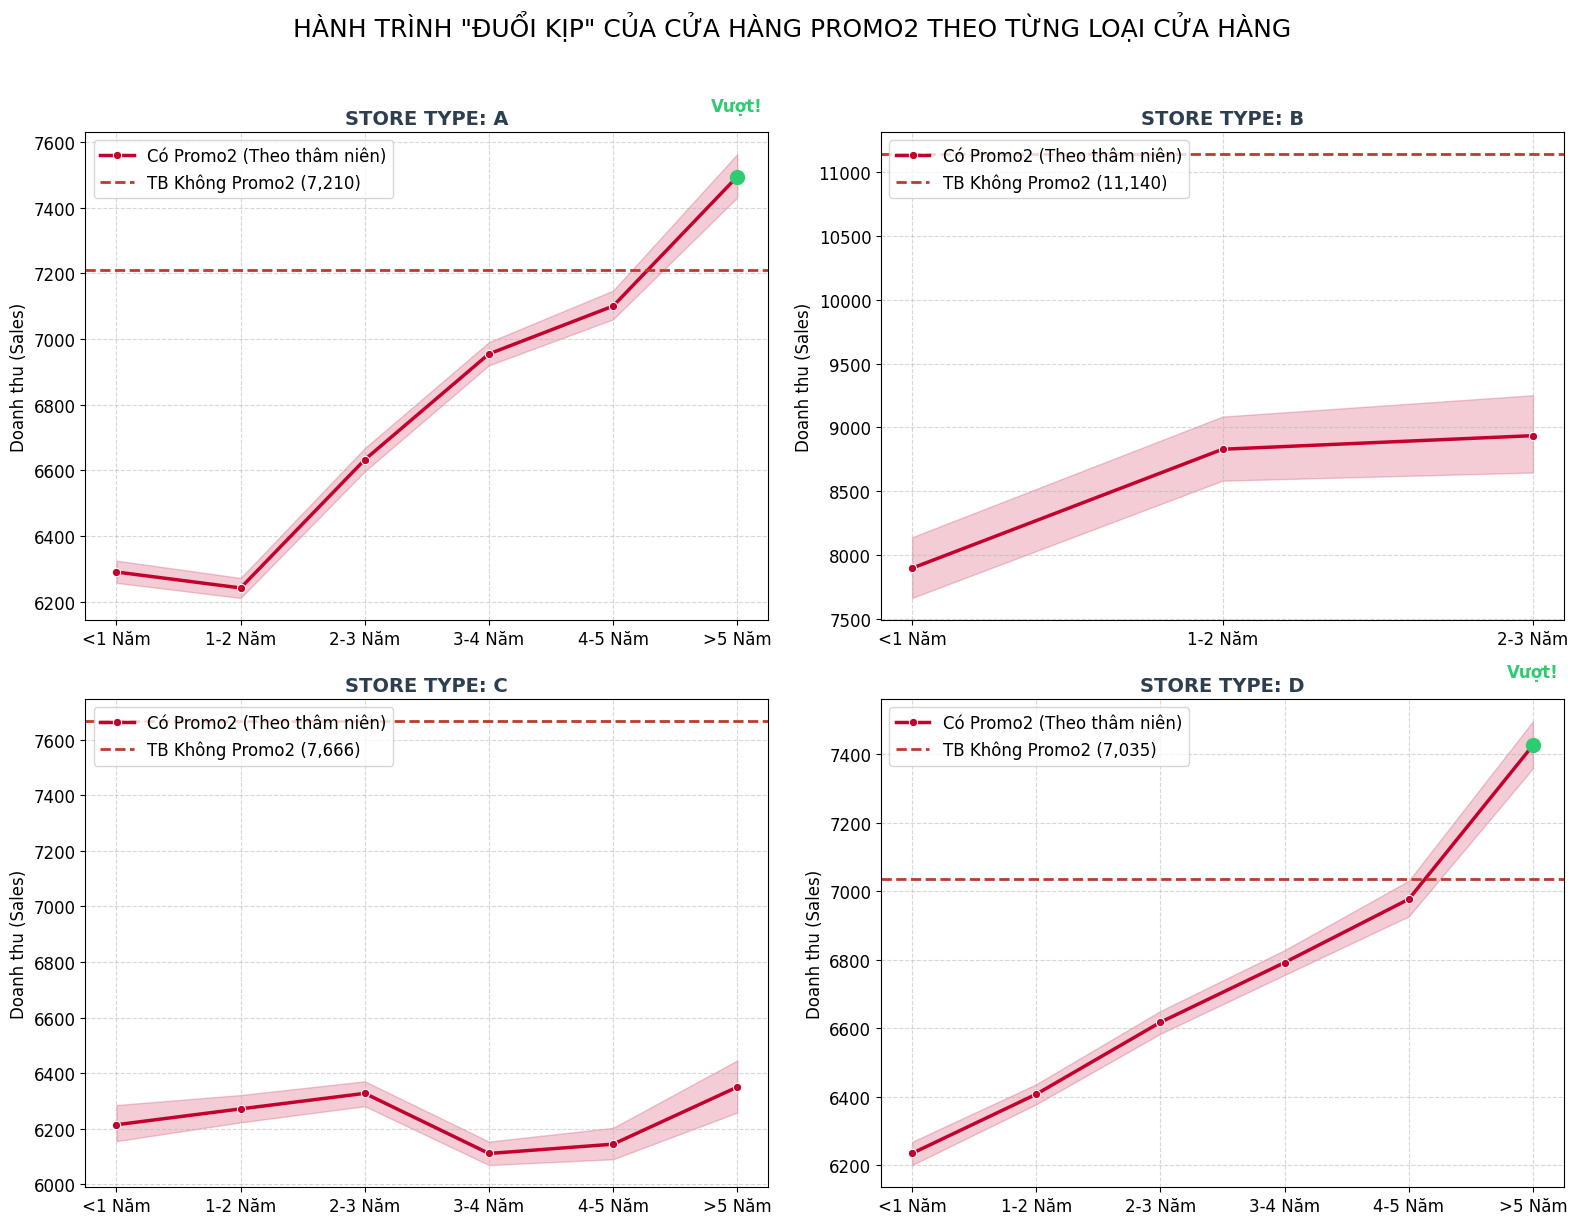

In [ ]:
# --- 4. IN BÁO CÁO CHI TIẾT RA TERMINAL ---
# Calculate baseline for each StoreType (average sales for stores NOT in Promo2)
# This baseline represents the "natural" sales performance without the long-term Promo2 program.
non_promo2_df = df_open[df_open['Promo2'] == 0]
baseline_data = non_promo2_df.groupby('StoreType')['Sales'].mean().to_dict()

# Get unique store types for iteration
store_types = sorted(df_open['StoreType'].unique())

print("Baseline Sales (Non-Promo2) per StoreType:")
for st, sales in baseline_data.items():
    print(f"  Store Type {st}: {sales:,.0f}")
print("\n" + "="*60)
print(f"{'BÁO CÁO CHI TIẾT: HIỆU QUẢ PROMO2 THEO THÂM NIÊN':^60}")
print("="*60)

for s_type in store_types:
    # 1. Lấy dữ liệu
    subset = df_p2[df_p2['StoreType'] == s_type]
    baseline = baseline_data.get(s_type, 0)

    print(f"\n🏷️  STORE TYPE: {s_type}")
    print(f"   ► Mức chuẩn (Không Promo2): {baseline:,.0f} (Mục tiêu cần vượt)")

    if subset.empty:
        print("   (!) Không có dữ liệu Promo2 để so sánh.")
        continue

    # 2. Tính trung bình theo nhóm thâm niên
    group_stats = subset.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)

    # 3. In bảng so sánh
    # Header của bảng con
    print(f"   {'-'*55}")
    print(f"   {'Giai đoạn':<12} | {'Doanh Thu':>10} | {'Chênh lệch':>15} | {'Trạng thái'}")
    print(f"   {'-'*55}")

    first_pass = False # Cờ để đánh dấu lần đầu vượt mặt

    for tenure, sales in group_stats.items():
        if pd.isna(sales): continue # Bỏ qua nếu nhóm đó không có dữ liệu

        diff = sales - baseline
        diff_pct = (diff / baseline) * 100

        # Xác định trạng thái và màu sắc (nếu terminal hỗ trợ, ở đây dùng ký tự)
        if diff > 0:
            status = "✅ VƯỢT"
            diff_str = f"+{diff:,.0f} (+{diff_pct:.1f}%)"

            # Kiểm tra xem đây có phải lần đầu tiên vượt không
            if not first_pass:
                first_pass_msg = tenure
                first_pass = True
        else:
            status = "🔻 THUA"
            diff_str = f"{diff:,.0f} ({diff_pct:.1f}%)"

        print(f"   {tenure:<12} | {sales:,.0f}      | {diff_str:>15} | {status}")

    # 4. Kết luận ngắn gọn cho từng StoreType
    print(f"   {'-'*55}")
    if first_pass:
        print(f"   => 🌟 KẾT LUẬN: Promo2 bắt đầu có lãi thực sự từ giai đoạn: {first_pass_msg}")
    else:
        print(f"   => ⚠️ KẾT LUẬN: Promo2 chưa bao giờ đánh bại được nhóm không khuyến mãi.")
    print("\n")

print("="*60)

# --- 3. VẼ BIỂU ĐỒ FACET (Lưới biểu đồ) ---
store_types = sorted(df_open['StoreType'].unique())
fig, axes = plt.subplots(2, 2, figsize=(16, 12)) # Lưới 2x2
axes = axes.flatten() # Làm phẳng mảng để dễ duyệt vòng lặp
ROSSMANN_RED = '#C3002D'
BASELINE_COLOR = '#c0392b'
for i, s_type in enumerate(store_types):
    ax = axes[i]

    # Lấy dữ liệu của StoreType hiện tại
    subset = df_p2[df_p2['StoreType'] == s_type]
    baseline = baseline_data.get(s_type, 0) # Lấy mức chuẩn của loại này

    # Nếu không có dữ liệu thì bỏ qua
    if subset.empty:
        ax.text(0.5, 0.5, 'Không có dữ liệu Promo2', ha='center')
        continue

    # A. Vẽ đường xu hướng thâm niên (ĐÃ SỬA: Màu ĐỎ ROSSMANN)
    sns.lineplot(data=subset, x='Tenure_Group', y='Sales',
                 marker='o', color=ROSSMANN_RED, linewidth=2.5, ax=ax, label='Có Promo2 (Theo thâm niên)')

    # B. Vẽ đường Baseline (Giữ nguyên màu Đỏ gạch)
    ax.axhline(y=baseline, color=BASELINE_COLOR, linestyle='--', linewidth=2,
               label=f'TB Không Promo2 ({baseline:,.0f})')

    # Trang trí (Giữ nguyên)
    ax.set_title(f'STORE TYPE: {s_type.upper()}', fontsize=14, fontweight='bold', color='#2c3e50')
    ax.set_xlabel('')
    ax.set_ylabel('Doanh thu (Sales)')
    ax.grid(True, linestyle='--', alpha=0.5)
    ax.legend(loc='upper left')

    # Đánh dấu điểm "Vượt mặt" (Giữ nguyên)
    # Lấy giá trị trung bình từng mốc thâm niên để so sánh
    means = subset.groupby('Tenure_Group')['Sales'].mean(numeric_only=True)
    for idx, (group, val) in enumerate(means.items()):
        if val > baseline:
            # Nếu doanh thu > baseline -> Tô điểm màu xanh lá để highlight
            ax.plot(idx, val, marker='o', markersize=10, color='#2ecc71')
            ax.text(idx, val + 200, 'Vượt!', ha='center', color='#2ecc71', fontweight='bold')

plt.suptitle('HÀNH TRÌNH "ĐUỔI KỊP" CỦA CỬA HÀNG PROMO2 THEO TỪNG LOẠI CỬA HÀNG', fontsize=18, y=1.02)
plt.tight_layout()
plt.show()

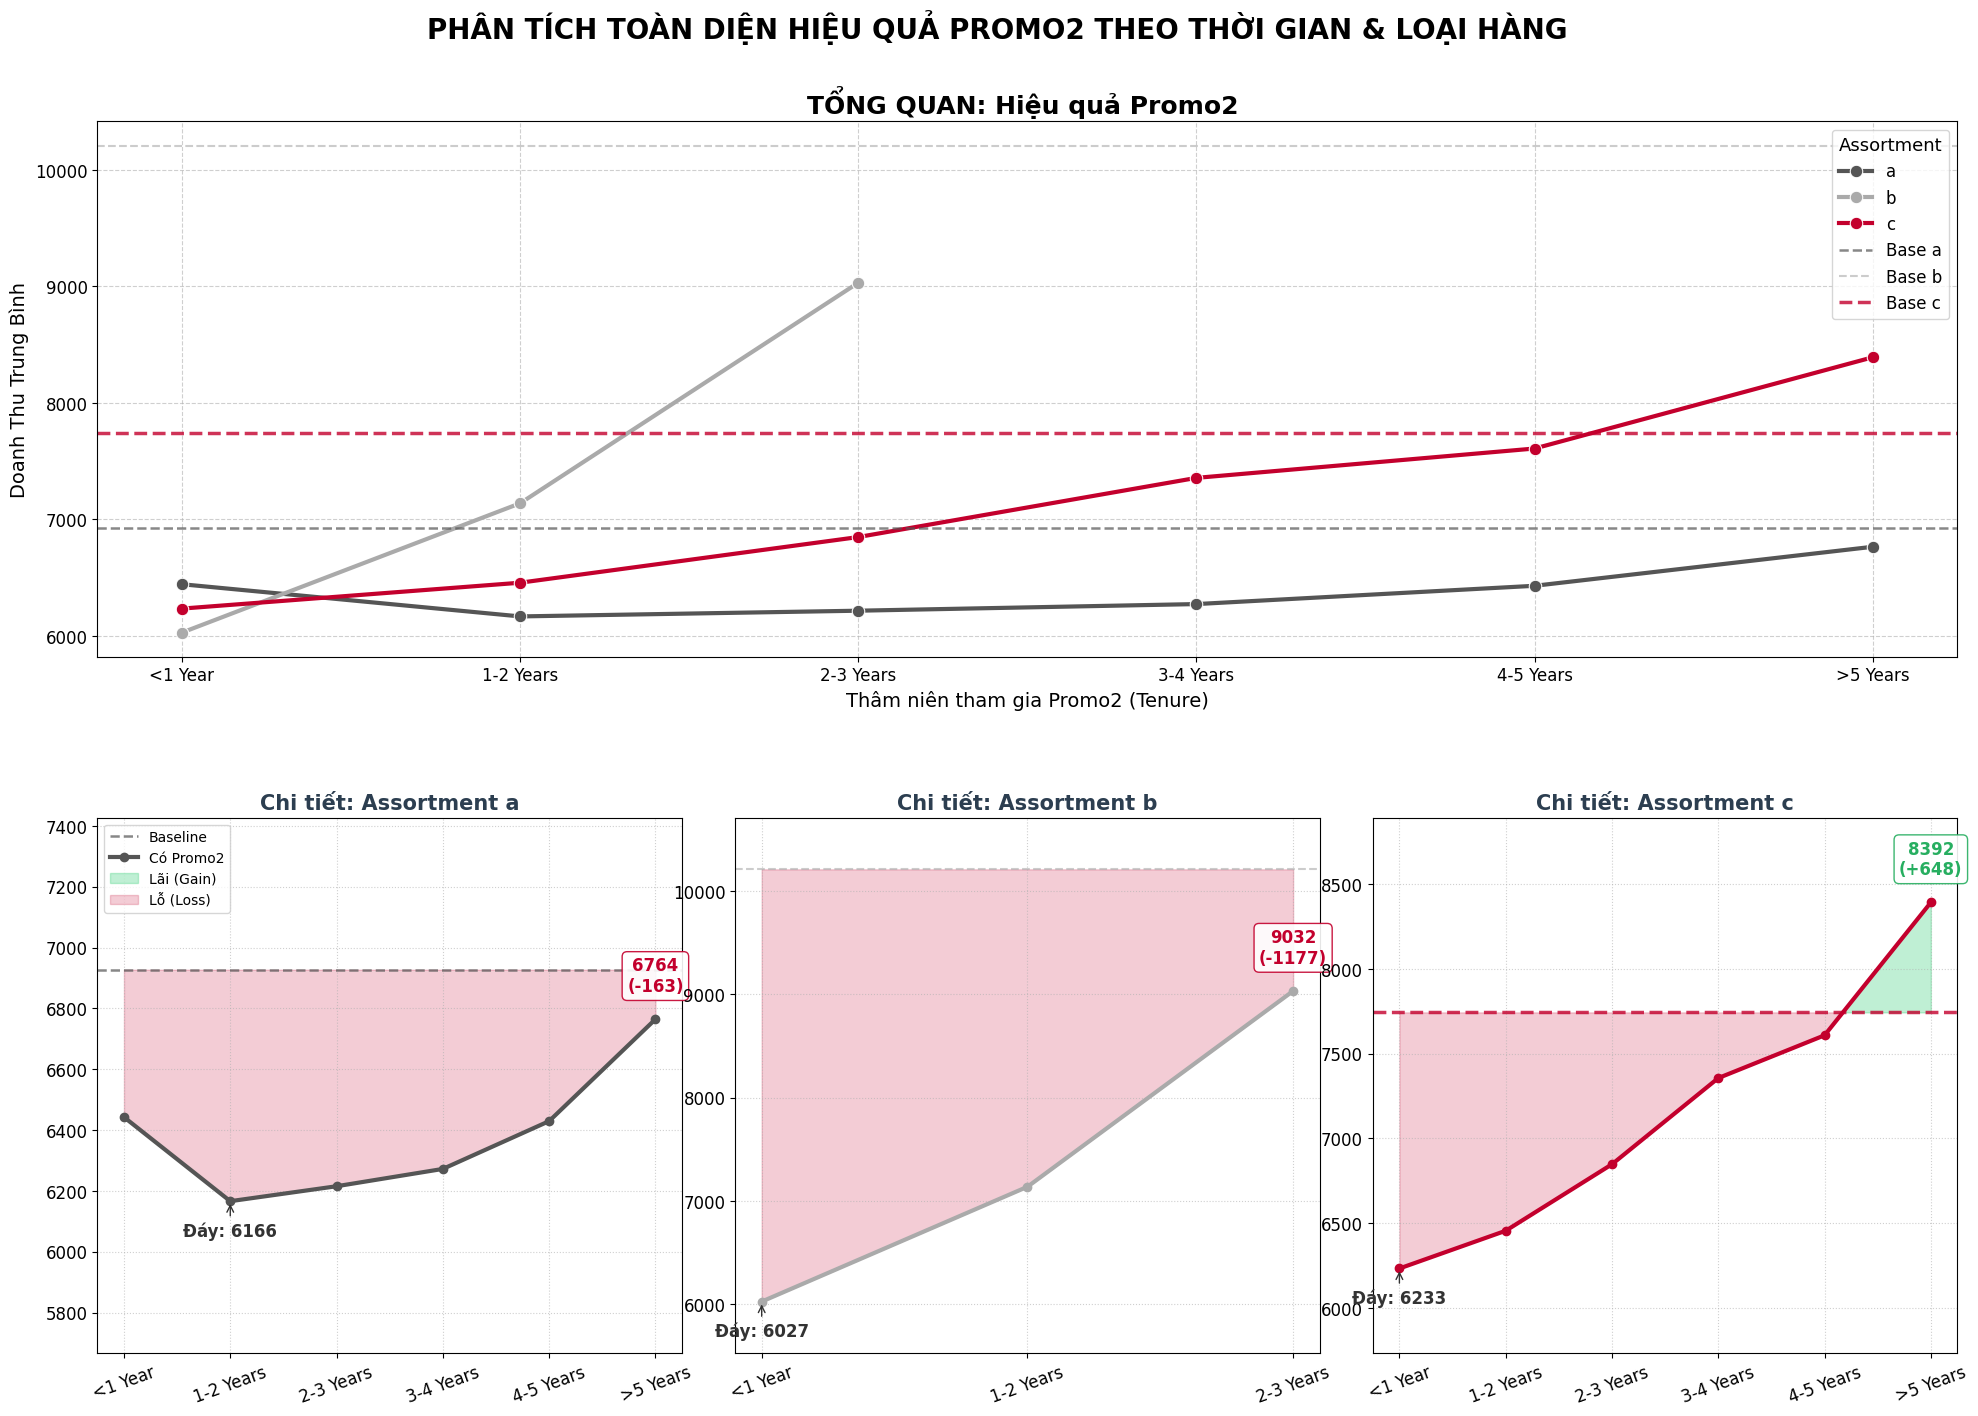


================ BÁO CÁO CHI TIẾT HIỆU QUẢ PROMO2 (DATA REPORT) ================

🔹 ASSORTMENT 'A'
   - Mức Baseline (Không Promo2): 6,927 Sales
   - Giai đoạn đầu (<1 Year): Giảm -7.00% so với baseline
   - Giai đoạn cuối (>5 Years): Giảm -2.35% so với baseline
   -> Đánh giá: CẦN CÂN NHẮC
----------------------------------------
🔹 ASSORTMENT 'B'
   - Mức Baseline (Không Promo2): 10,209 Sales
   - Giai đoạn đầu (<1 Year): Giảm -40.96% so với baseline
   - Giai đoạn cuối (>5 Years): Giảm +nan% so với baseline
   -> Đánh giá: CẦN CÂN NHẮC
----------------------------------------
🔹 ASSORTMENT 'C'
   - Mức Baseline (Không Promo2): 7,743 Sales
   - Giai đoạn đầu (<1 Year): Giảm -19.50% so với baseline
   - Giai đoạn cuối (>5 Years): Tăng +8.37% so với baseline
   -> Đánh giá: HIỆU QUẢ
----------------------------------------

📊 BẢNG MA TRẬN TĂNG TRƯỞNG (% GROWTH VS BASELINE)
(Giá trị dương = Lãi, Giá trị âm = Lỗ)

TenureBin   <1 Year  1-2 Years  2-3 Years  3-4 Years  4-5 Years  >5 Years
A

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. CHUẨN BỊ DỮ LIỆU (GIỮ NGUYÊN) ---
# (Giả định df_open đã có sẵn từ các bước trước của bạn)

promo2_df = df_open[df_open['Promo2'] == 1].copy()

promo2_df['Promo2Start'] = pd.to_datetime(
    promo2_df['Promo2SinceYear'].astype(int).astype(str) +
    promo2_df['Promo2SinceWeek'].astype(int).astype(str) + '1',
    format='%Y%W%w'
)

promo2_df['TenureDays'] = (promo2_df['Date'] - promo2_df['Promo2Start']).dt.days
promo2_df['TenureYears'] = promo2_df['TenureDays'] / 365.25

promo2_active = promo2_df[promo2_df['TenureDays'] >= 0].copy()

labels = ['<1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', '>5 Years']
promo2_active['TenureBin'] = pd.cut(
    promo2_active['TenureYears'],
    bins=[0, 1, 2, 3, 4, 5, 100],
    labels=labels,
    right=False
)

# --- 2. TÍNH TOÁN BASELINE & AGGREGATION (GIỮ NGUYÊN) ---

non_promo2 = df_open[df_open['Promo2'] == 0].copy()
baseline_sales_general = non_promo2.groupby('Assortment')['Sales'].mean()

# Aggregation cho Hàng 1 (Chỉ cần 1 bộ dữ liệu tổng bao gồm cả a, b, c)
agg_all = promo2_active.groupby(['Assortment', 'TenureBin'], observed=False)['Sales'].mean().reset_index()

# Baseline chi tiết cho từng Assortment (cho Hàng 2)
baseline_assortment_dict = non_promo2.groupby('Assortment')['Sales'].mean()
unique_assortments = sorted(promo2_active['Assortment'].unique())

# --- 3. THIẾT LẬP KHUNG HÌNH (ĐIỀU CHỈNH LAYOUT) ---

fig = plt.figure(figsize=(24, 16))
gs = fig.add_gridspec(2, 6, hspace=0.3, wspace=0.2)

# Định nghĩa màu sắc thống nhất
ROSSMANN_RED = '#C3002D'
ROSSMANN_GREY = '#555555'
ROSSMANN_LIGHT_GREY = '#AAAAAA'
palette = {
    'c': ROSSMANN_RED,
    'a': ROSSMANN_GREY,
    'b': ROSSMANN_LIGHT_GREY
}

# --- 4. VẼ HÀNG 1: TỔNG QUAN TẤT CẢ ASSORTMENT ---
ax1 = fig.add_subplot(gs[0, :])

# Vẽ Line chart (GIỮ NGUYÊN)
sns.lineplot(data=agg_all, x='TenureBin', y='Sales', hue='Assortment',
             marker='o', linewidth=3, markersize=9, palette=palette, ax=ax1)

# Vẽ đường baseline (Sửa lại logic màu baseline)
for assortment, baseline in baseline_sales_general.items():
    if assortment in agg_all['Assortment'].unique():

        # LOGIC CHỌN MÀU MỚI: Dùng màu của line chính cho baseline của Assortment đó
        line_color = palette.get(assortment, '#333333') # Lấy màu từ palette

        # Điều chỉnh độ đậm nhạt và alpha cho Baseline
        if assortment == 'c':
            line_width = 2.5
            line_alpha = 0.8
        elif assortment == 'a':
            line_width = 1.8
            line_alpha = 0.7
        else: # assortment == 'b'
            line_width = 1.5
            line_alpha = 0.6

        ax1.axhline(y=baseline, color=line_color,
                    linestyle='--', alpha=line_alpha, linewidth=line_width,
                    label=f'Base {assortment}')

ax1.set_title('TỔNG QUAN: Hiệu quả Promo2 ', fontsize=18, fontweight='bold')
ax1.set_ylabel('Doanh Thu Trung Bình', fontsize=14)
ax1.set_xlabel('Thâm niên tham gia Promo2 (Tenure)', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.6)
ax1.legend(title='Assortment', fontsize=12, title_fontsize=13)

# --- 5. VẼ HÀNG 2: CHI TIẾT HIỆU QUẢ (GAIN/LOSS) ---

for i, a_type in enumerate(unique_assortments):
    col_start = i * 2
    col_end = col_start + 2
    ax = fig.add_subplot(gs[1, col_start:col_end])

    subset = promo2_active[promo2_active['Assortment'] == a_type]
    baseline = baseline_assortment_dict.get(a_type, 0)

    if subset.empty:
        ax.text(0.5, 0.5, 'Không có dữ liệu', ha='center')
        continue

    group_means = subset.groupby('TenureBin', observed=False)['Sales'].mean(numeric_only=True)
    x_labels = group_means.index.astype(str)
    y_values = group_means.values

    # Lấy màu line chính xác từ palette
    line_color = palette.get(a_type, '#888888')

    # LOGIC MÀU BASELINE: Baseline dùng chính màu line nhưng alpha thấp hơn.
    baseline_color = line_color
    if a_type == 'c':
        baseline_alpha = 0.8
        baseline_width = 2.5
    elif a_type == 'a':
        baseline_alpha = 0.7
        baseline_width = 1.8
    else: # a_type == 'b'
        baseline_alpha = 0.6
        baseline_width = 1.5

    # A. Vẽ đường Baseline (Cập nhật tham số)
    ax.axhline(y=baseline, color=baseline_color,
               linestyle='--', linewidth=baseline_width, alpha=baseline_alpha,
               label='Baseline')

    # B. Vẽ đường Promo2 (Giữ nguyên)
    ax.plot(x_labels, y_values, marker='o', color=line_color, linewidth=3, label='Có Promo2')

    # C. TÔ MÀU (Giữ nguyên)
    # Phần tô màu Gain/Loss giữ nguyên logic tính toán, chỉ bị ảnh hưởng bởi Baseline (Đã sửa ở trên)
    ax.fill_between(x_labels, y_values, baseline,
                    where=(y_values >= baseline), interpolate=True, color='#2ecc71', alpha=0.3, label='Lãi (Gain)')
    ax.fill_between(x_labels, y_values, baseline,
                    where=(y_values < baseline), interpolate=True, color=ROSSMANN_RED, alpha=0.2, label='Lỗ (Loss)')

    # D. SMART ANNOTATION (Giữ nguyên logic tính toán, chỉ chỉnh màu mũi tên nếu cần)
    y_values_finite = y_values[np.isfinite(y_values)]

    if len(y_values_finite) > 0:
        # Min Point Annotation
        min_val_finite = np.nanmin(y_values_finite)
        min_idx_finite = np.where(y_values == min_val_finite)[0][0]
        # Dùng màu xám đậm cho text thay vì đỏ cũ
        ax.annotate(f'Đáy: {min_val_finite:.0f}',
                    xy=(min_idx_finite, min_val_finite),
                    xytext=(0, -25), textcoords='offset points',
                    ha='center', color='#333333', fontweight='bold',
                    arrowprops=dict(arrowstyle='->', color='#333333'))

        # End Point Annotation
        end_idx_finite = np.where(np.isfinite(y_values))[0][-1]
        last_y_val = y_values[end_idx_finite]
        diff_end = last_y_val - baseline
        # Status color: Xanh nếu dương, Đỏ Rossmann nếu âm (để cảnh báo)
        status_color = '#27ae60' if diff_end > 0 else ROSSMANN_RED

        ax.annotate(f'{last_y_val:.0f}\n({diff_end:+.0f})',
                    xy=(end_idx_finite, last_y_val),
                    xytext=(0, 20), textcoords='offset points',
                    ha='center', color=status_color, fontweight='bold',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec=status_color, alpha=0.9))

    ax.set_title(f'Chi tiết: Assortment {a_type}', fontsize=15, fontweight='bold', color='#2c3e50')

    # Thiết lập giới hạn trục Y
    y_min_lim = np.nanmin(y_values_finite) if len(y_values_finite) > 0 else baseline
    y_max_lim = np.nanmax(y_values_finite) if len(y_values_finite) > 0 else baseline
    ax.set_ylim(bottom=min(y_min_lim, baseline) - 500, top=max(y_max_lim, baseline) + 500)

    ax.grid(True, linestyle=':', alpha=0.6)
    ax.tick_params(axis='x', rotation=20)

    if i == 0:
        ax.legend(loc='upper left', fontsize='small')

plt.suptitle('PHÂN TÍCH TOÀN DIỆN HIỆU QUẢ PROMO2 THEO THỜI GIAN & LOẠI HÀNG',
             fontsize=20, fontweight='bold', y=0.95)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

# --- 6. TẠO VÀ IN BÁO CÁO CHI TIẾT (GIỮ NGUYÊN) ---

print("\n" + "="*80)
print(" BÁO CÁO CHI TIẾT HIỆU QUẢ PROMO2 (DATA REPORT) ".center(80, "="))
print("="*80 + "\n")

report_df = agg_all.merge(
    pd.Series(baseline_assortment_dict, name='Baseline'),
    on='Assortment',
    how='left'
)

report_df['Diff_Abs'] = report_df['Sales'] - report_df['Baseline']
report_df['Diff_Pct'] = (report_df['Diff_Abs'] / report_df['Baseline']) * 100

for assortment in unique_assortments:
    subset = report_df[report_df['Assortment'] == assortment]
    baseline_val = baseline_assortment_dict.get(assortment, 0)

    print(f"🔹 ASSORTMENT '{assortment.upper()}'")
    print(f"   - Mức Baseline (Không Promo2): {baseline_val:,.0f} Sales")

    start_row = subset[subset['TenureBin'] == '<1 Year']
    end_row = subset[subset['TenureBin'] == '>5 Years']

    if not start_row.empty:
        s_val = start_row['Diff_Pct'].values[0]
        print(f"   - Giai đoạn đầu (<1 Year): {'Tăng' if s_val > 0 else 'Giảm'} {s_val:+.2f}% so với baseline")

    if not end_row.empty:
        e_val = end_row['Diff_Pct'].values[0]
        status = "HIỆU QUẢ" if e_val > 0 else "CẦN CÂN NHẮC"
        print(f"   - Giai đoạn cuối (>5 Years): {'Tăng' if e_val > 0 else 'Giảm'} {e_val:+.2f}% so với baseline")
        print(f"   -> Đánh giá: {status}")

    print("-" * 40)

print("\n📊 BẢNG MA TRẬN TĂNG TRƯỞNG (% GROWTH VS BASELINE)")
print("(Giá trị dương = Lãi, Giá trị âm = Lỗ)\n")

pivot_growth = report_df.pivot(index='Assortment', columns='TenureBin', values='Diff_Pct')
pd.options.display.float_format = '{:+.2f}%'.format
print(pivot_growth)
pd.reset_option('display.float_format')
print("\n" + "="*80)

# --- 7. KIỂM TRA DỮ LIỆU BỊ THIẾU (GIỮ NGUYÊN) ---
print("\n" + "="*80)
print(" KIỂM TRA SỐ LƯỢNG DỮ LIỆU (DATA COUNT CHECK) ".center(80, "="))
print("="*80 + "\n")

audit_table = promo2_active.groupby(['Assortment', 'TenureBin'], observed=False).size().unstack(fill_value=0)
print("Số lượng bản ghi dữ liệu (Data Points) tại mỗi mốc thâm niên:")
print(audit_table)
print("\n" + "-"*80)

if 'b' in audit_table.index:
    assortment_b_counts = audit_table.loc['b']
    missing_bins = assortment_b_counts[assortment_b_counts == 0].index.tolist()
    print(f"🧐 PHÂN TÍCH ASSORTMENT 'b':")
    if missing_bins:
        print(f"-> Dữ liệu hoàn toàn TRỐNG tại các khoảng: {', '.join(missing_bins)}")
        print("-> LÝ DO: Không có cửa hàng loại 'b' nào chạy Promo2 đủ lâu để đạt đến các mốc này.")
    else:
        print("-> Có dữ liệu ở tất cả các mốc.")
print("\n" + "="*80)

**1. NHÓM "CẮT LỖ NGAY LẬP TỨC" (STOP DOING)**
Đây là khu vực mà càng cố gắng, chúng ta càng sai lầm. Promo2 tại đây không phải là liều thuốc, nó là "thuốc độc".


**Store Type B - "Gã Khổng Lồ Ngủ Mê":**

Thực tế: Với doanh thu khủng khiếp 11k/ngày, chúng ta lầm tưởng đây là mỏ vàng để khai thác thêm bằng khuyến mãi. Nhưng sai lầm chết người nằm ở chỗ ta đã đánh đồng "lượt khách" với "cơ hội bán giảm giá".


Tại sao phải dừng? Khách hàng tại Store 'b' (Sân bay/Nhà ga) sở hữu một đặc quyền: Sự Độc Quyền Về Thời Gian & Không Gian. Họ mua vì "Cần Gấp", vì họ đang vội vã chờ tàu xe, chứ không phải vì "Giá Rẻ". Độ nhạy cảm về giá của họ gần như bằng không.



Hậu quả: Khi chạy Promo2 tại đây, bạn đang bán một chai nước (thứ họ bắt buộc phải mua) với giá rẻ mạt. Bạn đang "tặng tiền" cho những người vốn dĩ đã sẵn sàng trả đủ. Doanh thu có thể cao, nhưng biên lợi nhuận bị bào mòn vô nghĩa.

**Storetype 'b' + Assortment 'b' (Hàng cao cấp/chuyên biệt) - "Sai Thời Điểm, Sai Tư Duy":**

Thực tế: Con số lỗ kỷ lục -40.96% ngay năm đầu tiên là một cú tát mạnh vào chiến lược giảm giá hàng cao cấp.


Tại sao phải dừng? Hãy tưởng tượng tâm lý khách hàng: Họ đang vội vã (như ở Store 'b'), tâm trí họ dồn vào chuyến đi sắp tới. Họ không có tâm trạng để cân nhắc một món hàng xa xỉ hay chuyên biệt chỉ vì nó rẻ hơn vài đồng.


Hậu quả: Việc dán tem giảm giá lên hàng Assortment 'b' không chỉ thất bại trong việc tăng doanh số mà còn làm "rẻ tiền hóa" hình ảnh sản phẩm, khiến khách hàng nghi ngờ giá trị thực của nó.

**Store Type C - "Vùng Đất Chết":**

Thực tế: Mức lỗ triền miên ~20% là minh chứng rõ nhất cho thấy khách hàng tại đây hoàn toàn "miễn nhiễm" với các liều thuốc kích cầu của chúng ta.

Tại sao phải dừng? Có những vị trí địa lý hoặc tệp khách hàng mà hành vi mua sắm của họ không được thúc đẩy bởi các yếu tố ngoại sinh như Promo. Tiếp tục đổ tiền vào đây giống như cố gắng tưới nước cho một cái cây đã chết khô.



**2. NHÓM "ĐẦU TƯ DÀI HẠN" (KEEP DOING)**
Ngược lại với bức tranh ảm đạm trên là một điểm sáng đầy hy vọng, nơi "lãi suất kép" của lòng trung thành thực sự hoạt động.

**Store Type A & D + Assortment 'c' - "Cặp Đôi Hoàn Hảo Của Tương Lai":**

Thực tế: Khởi đầu chậm chạp, thậm chí đau đớn trong 1-2 năm đầu. Nhưng sau 5 năm, Assortment 'c' (Hàng mở rộng/mới) tại các cửa hàng này vươn lên mạnh mẽ, đánh bại mức chuẩn.

Tại sao phải tiếp tục?


Đúng người: Store 'a' & 'd' nằm trong khu dân cư, nơi khách hàng cực kỳ nhạy cảm về giá (High Price Elasticity). Họ biết chính xác giá một chai dầu gội là bao nhiêu.



Đúng chiến thuật: Tại đây, Promo2 đóng vai trò là "người dẫn đường". Khách hàng thường ngại thử sản phẩm mới (Assortment 'c') vì sợ phí tiền. Promo2 hạ thấp rào cản đó, khuyến khích họ dùng thử.

Kết quả: Một khi họ đã dùng thử và thích (nhờ Promo2), họ sẽ hình thành thói quen. Sau 5 năm, chúng ta không chỉ bán được hàng giảm giá, mà chúng ta đã xây dựng được một tệp khách hàng trung thành, những người coi Store 'a'/'d' là điểm đến hàng ngày của họ. Đây chính là "Đế chế khách hàng" mà chúng ta hướng tới

## 3. BONGO

### --- CHIẾN LƯỢC ---
### 1. Chiến lược "Cắt Lỗ Ngay Lập Tức" (Stop Doing)
**Dừng ngay Promo2 tại Store Type B:**

Lý do: Đây là những "Con bò sữa" (Cash Cows) với lượng khách tự nhiên khổng lồ. Đừng cố gắng kích cầu ở nơi cầu đã vượt cung hoặc cầu không nhạy cảm về giá.

Thay thế: Tập trung vào tối ưu quy trình thanh toán nhanh, đảm bảo hàng luôn đầy kệ (Availability) thay vì giảm giá.

**Dừng Promo2 cho Store Type C:**

Lý do: Lỗ triền miên ~20% qua các năm chứng tỏ tệp khách hàng ở đây không quan tâm đến Promo2.

Thay thế: Cần nghiên cứu lại thị trường khu vực này. Có thể vấn đề nằm ở vị trí cửa hàng hoặc danh mục sản phẩm không phù hợp với dân cư địa phương, không phải do thiếu khuyến mãi.

**Loại bỏ Assortment 'b' (Specialized) khỏi danh mục khuyến mãi:**

Lý do: Tránh làm mất giá trị thương hiệu của dòng hàng cao cấp.

Thay thế: Sử dụng chiến lược "Khan hiếm" (Scarcity) hoặc "Thành viên VIP" thay vì giảm giá đại trà.

### 2. Chiến lược "Đầu Tư Dài Hạn" (Keep Doing & Improve)

**Tập trung tổng lực vào cặp đôi hoàn hảo:** Type A/D + Assortment 'c' (Extended): **bold text**

Đây là nhóm duy nhất chứng minh được hiệu quả theo thời gian. Assortment 'c' (hàng mở rộng) cần Promo2 để kích thích khách hàng dùng thử các sản phẩm mới, từ đó hình thành thói quen.

**Thiết lập lại KPI đánh giá:**

Với nhóm cửa hàng này, cấm đánh giá hiệu quả Promo2 theo Quý hoặc Năm đầu tiên.

Chấp nhận "gồng lỗ" hoặc hòa vốn trong 3 năm đầu (giai đoạn giáo dục thị trường).

Cam kết tài chính tối thiểu 5 năm để đạt điểm rơi phong độ (+16% tăng trưởng).

### 3. Chiến lược "Tái Định Vị" cho Assortment 'a' (Basic)

Thực tế: Hàng cơ bản a- Basic (kem đánh răng, xà phòng...) có biên lợi nhuận mỏng và nhu cầu ổn định. Promo2 không làm tăng sức mua đột biến (ăn bao nhiêu cũng chỉ dùng bấy nhiêu).

Hành động: Không chạy Promo2 đơn lẻ cho Assortment 'a'. Chỉ sử dụng Assortment 'a' làm "Mồi câu" (Loss Leader) trong các gói combo để bán kèm Assortment 'c'.

Ví dụ: Không giảm giá tuýp kem đánh răng (Type a). Nhưng giảm giá tuýp kem đánh răng NẾU mua kèm một chai nước hoa hoặc mỹ phẩm dưỡng da (Type c).